# Basic_Autoencoder
- MNIST
- Neural Network
- 1 hidden layers

In [ ]:
# 모듈 임포트
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# 하이퍼파라미터 설정
batch_size = 16
learning_rate = 0.0002
num_epoch = 5

In [ ]:
# 데이터
mnist_train = dsets.MNIST('./', train=True, transform=transforms.ToTensor(), download=True)
mnist_test = dsets.MNIST('./', train=False, transform=transforms.ToTensor(), download=True)

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 9.91M/9.91M [00:00<00:00, 51.0MB/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 28.9k/28.9k [00:00<00:00, 2.15MB/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 1.65M/1.65M [00:00<00:00, 14.0MB/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 4.54k/4.54k [00:00<00:00, 1.29MB/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
# 데이터 로더
train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True)
test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=2, drop_last=True)

In [ ]:
# 모델
class Autoencoder(nn.Module):
  def __init__(self):
    super(Autoencoder, self).__init__()
    self.encoder = nn.Linear(28 * 28, 20)
    self.decoder = nn.Linear(20, 28 * 28)

  def forward(self, x):
    x = x.view(batch_size, -1)
    encoded = self.encoder(x)
    out = self.decoder(encoded).view(batch_size, 1, 28, 28)

    return out

model = Autoencoder()

In [ ]:
# 손실 함수 및 옵티마이저
loss_func = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# 학습
loss_arr = []

for epoch in range(num_epoch):
  for j, [X, Y] in enumerate(train_loader):
    optimizer.zero_grad()

    output = model(X)
    loss = loss_func(output, X)
    loss.backward()
    optimizer.step()

    if j % 1000 == 0:
      print(loss)
      loss_arr.append(loss.cpu().data.numpy())

tensor(0.0296, grad_fn=<MseLossBackward0>)
tensor(0.0253, grad_fn=<MseLossBackward0>)
tensor(0.0251, grad_fn=<MseLossBackward0>)
tensor(0.0265, grad_fn=<MseLossBackward0>)
tensor(0.0245, grad_fn=<MseLossBackward0>)
tensor(0.0259, grad_fn=<MseLossBackward0>)
tensor(0.0228, grad_fn=<MseLossBackward0>)
tensor(0.0226, grad_fn=<MseLossBackward0>)
tensor(0.0264, grad_fn=<MseLossBackward0>)
tensor(0.0242, grad_fn=<MseLossBackward0>)
tensor(0.0246, grad_fn=<MseLossBackward0>)
tensor(0.0260, grad_fn=<MseLossBackward0>)
tensor(0.0233, grad_fn=<MseLossBackward0>)
tensor(0.0223, grad_fn=<MseLossBackward0>)
tensor(0.0178, grad_fn=<MseLossBackward0>)
tensor(0.0231, grad_fn=<MseLossBackward0>)
tensor(0.0234, grad_fn=<MseLossBackward0>)
tensor(0.0250, grad_fn=<MseLossBackward0>)
tensor(0.0236, grad_fn=<MseLossBackward0>)
tensor(0.0241, grad_fn=<MseLossBackward0>)


torch.Size([16, 28, 28])


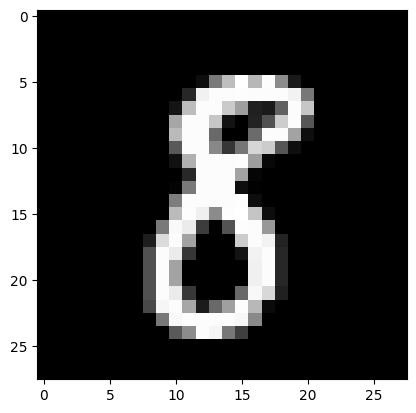

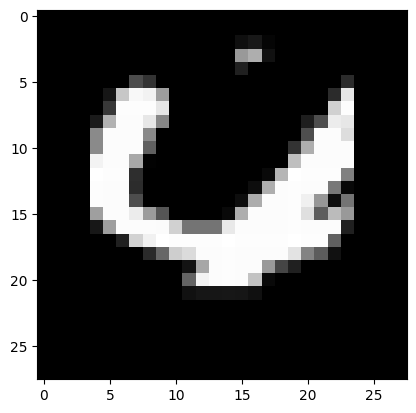

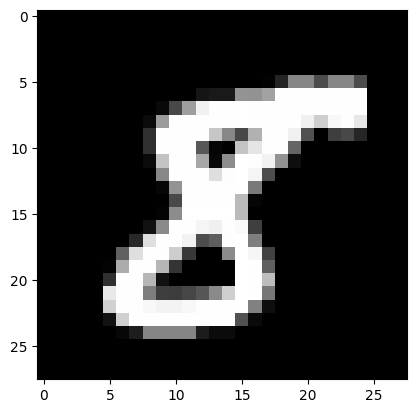

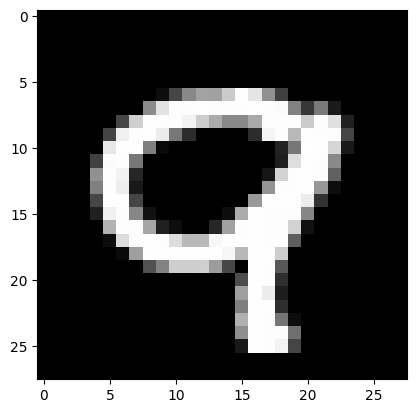

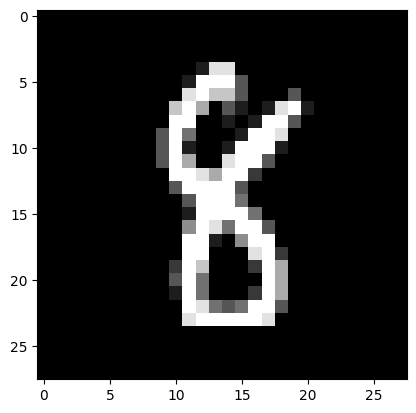

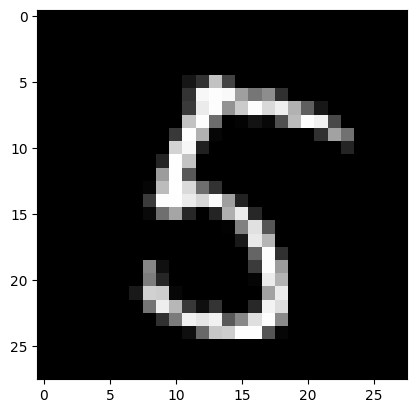

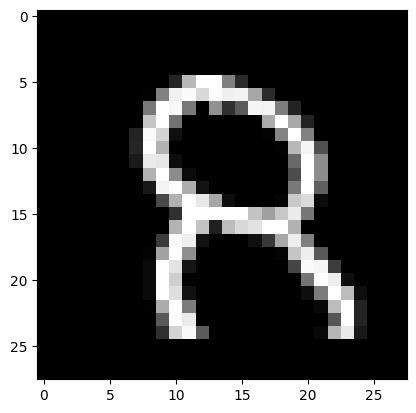

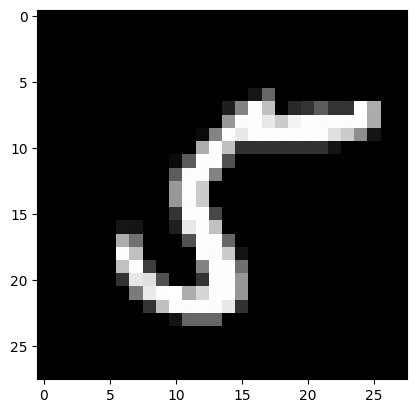

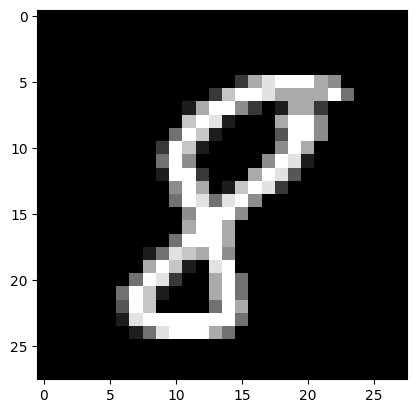

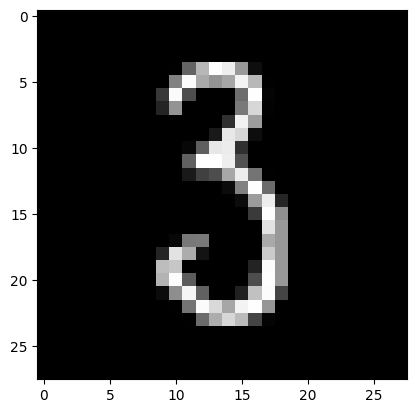

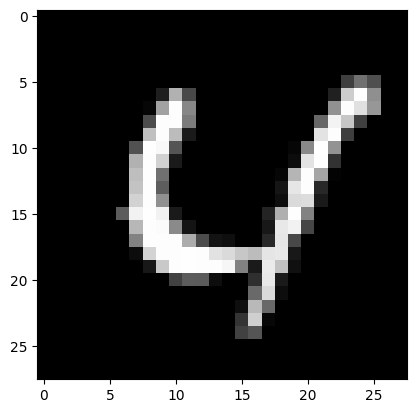

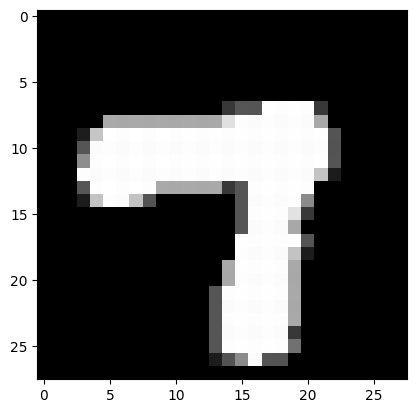

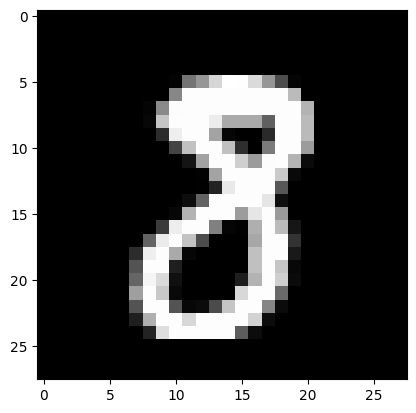

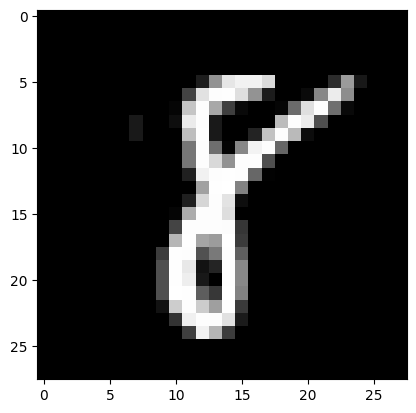

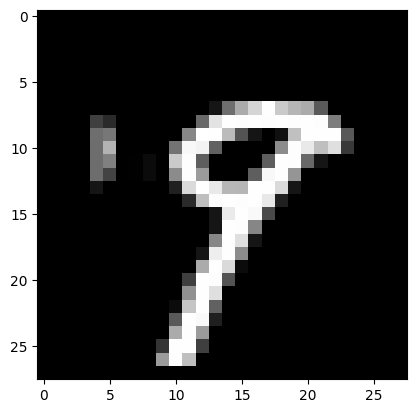

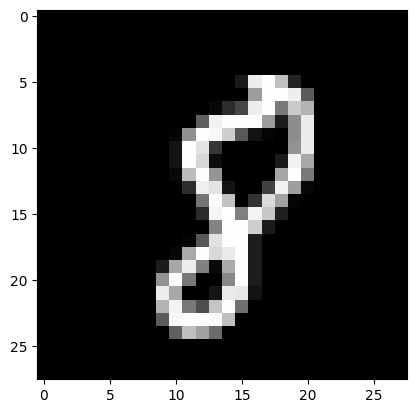

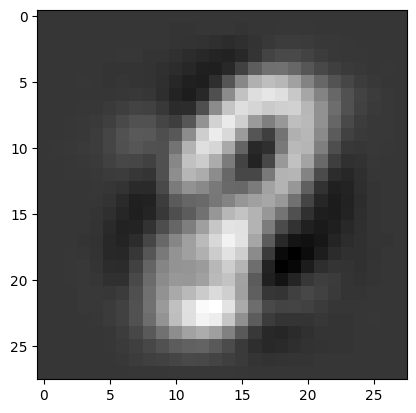

In [ ]:
# 학습 이미지 확인
out_img = torch.squeeze(output.data)
print(out_img.size())

for i in range(out_img.size()[0]):
  plt.imshow(torch.squeeze(X[i]).numpy(), cmap='gray')
  plt.show()
  plt.imshow(out_img[i].numpy(), cmap='gray')

In [ ]:
for i in range(1):
  for X, Y in test_loader:
    optimizer.zero_grad()
    output = model(X)
    loss = loss_func(output, X)
    loss.backward()
    optimizer.step()

torch.Size([16, 28, 28])


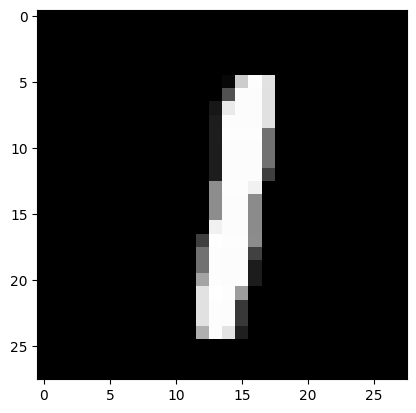

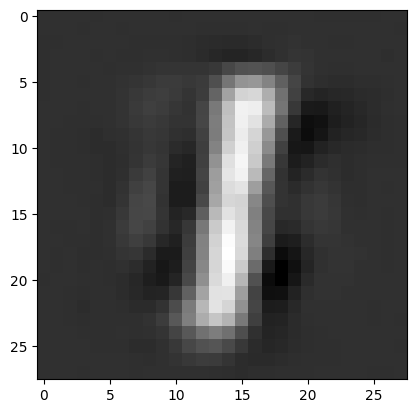

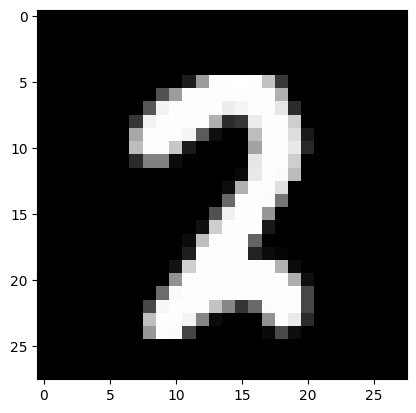

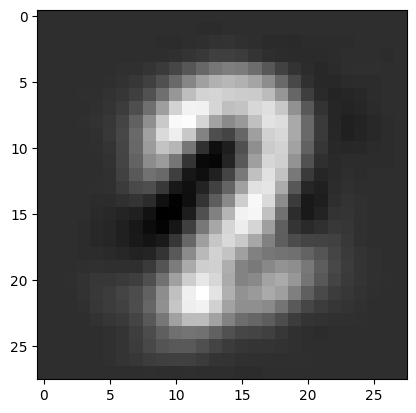

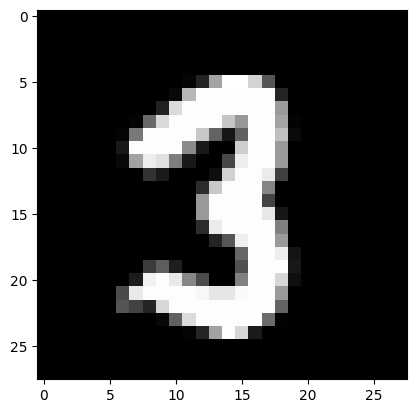

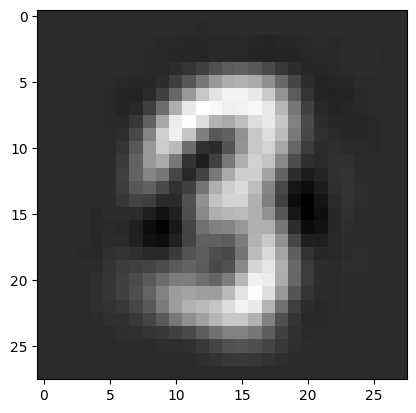

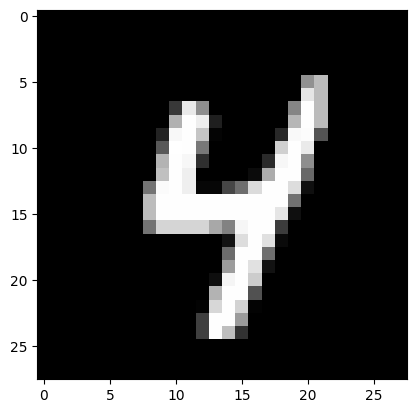

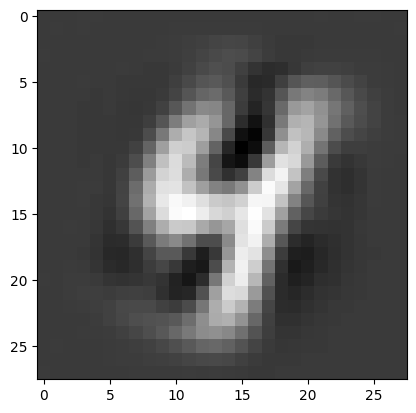

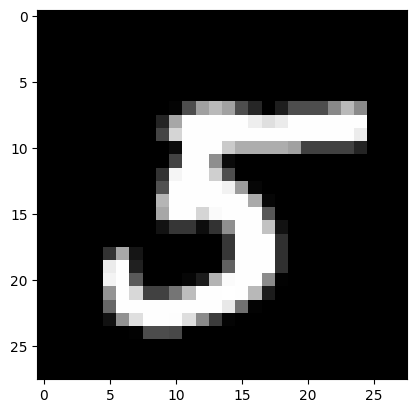

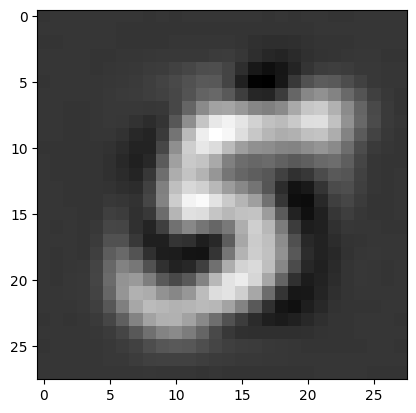

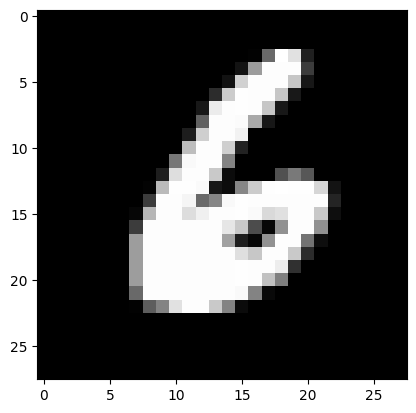

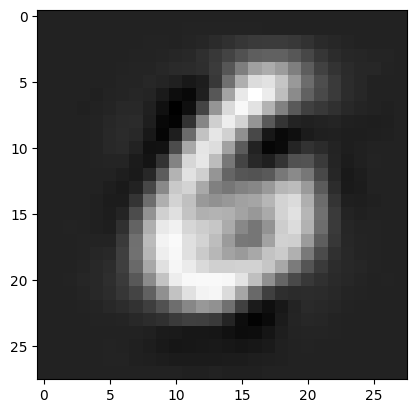

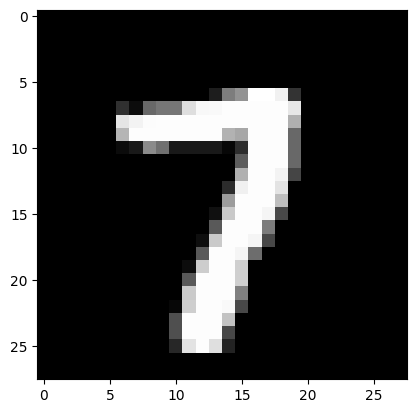

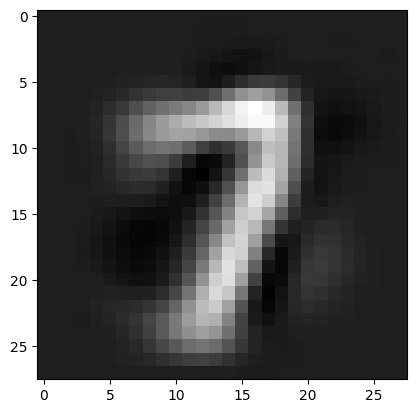

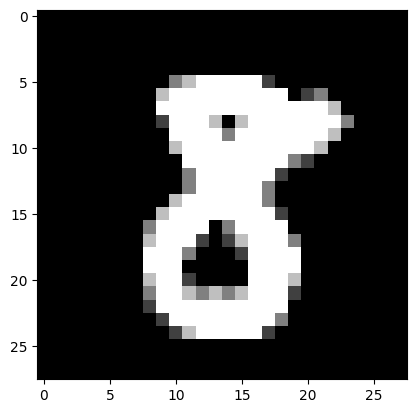

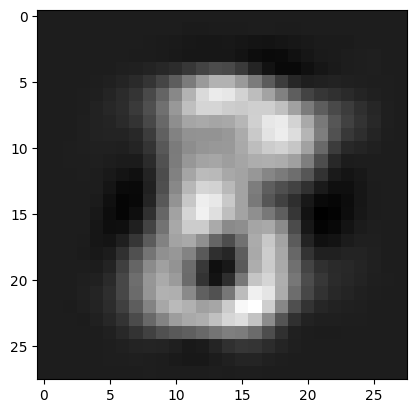

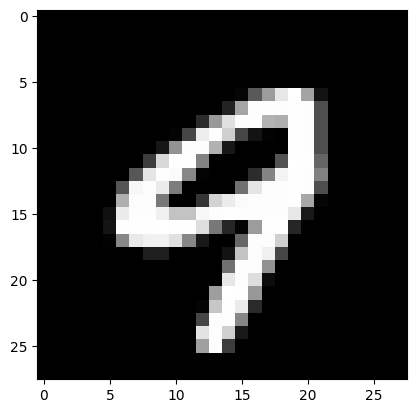

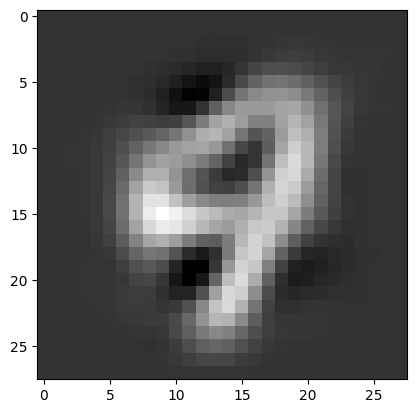

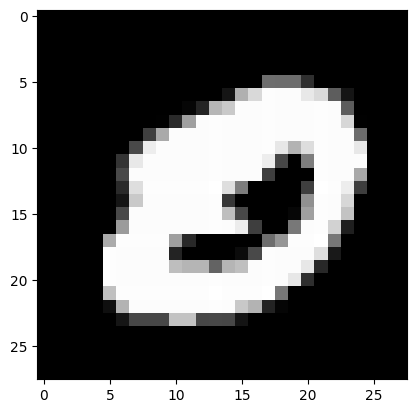

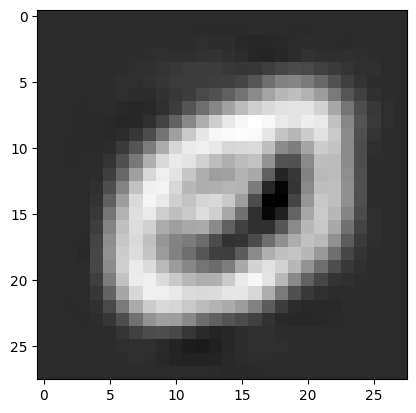

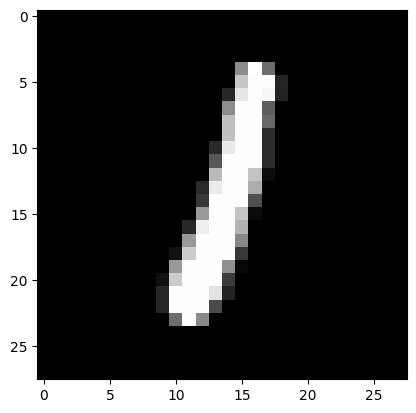

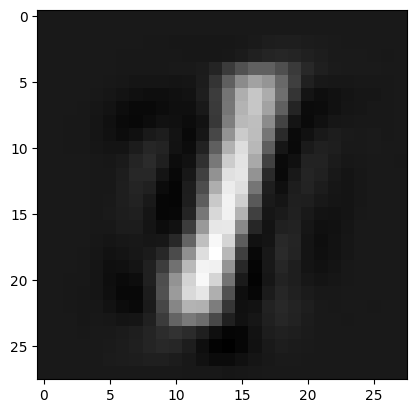

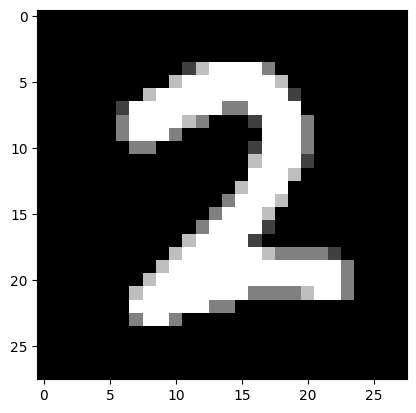

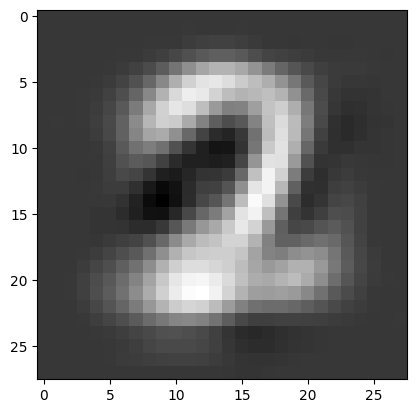

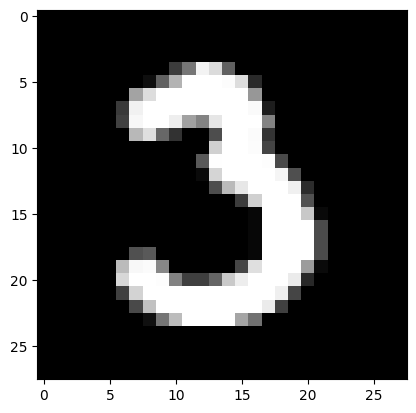

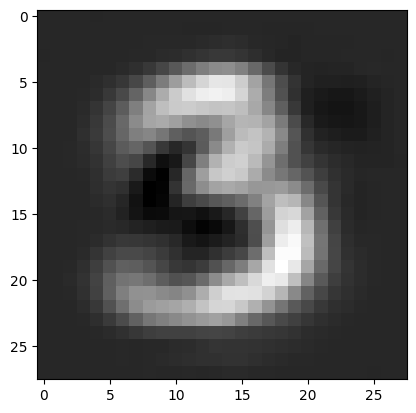

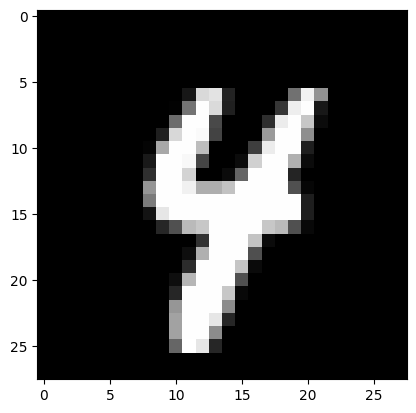

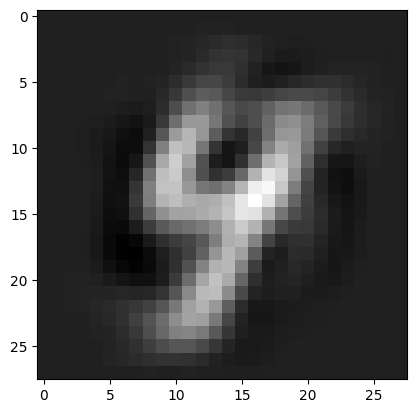

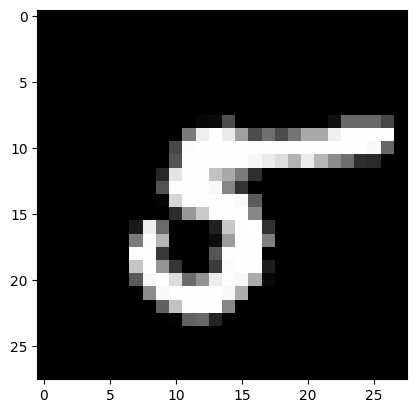

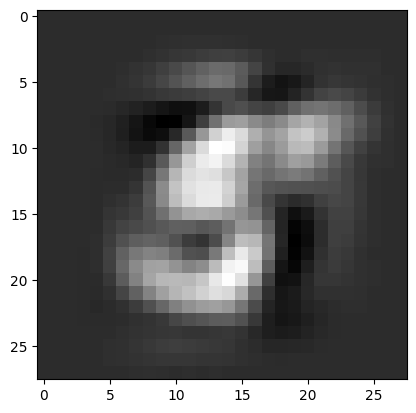

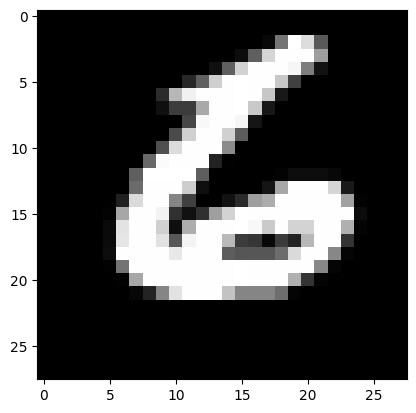

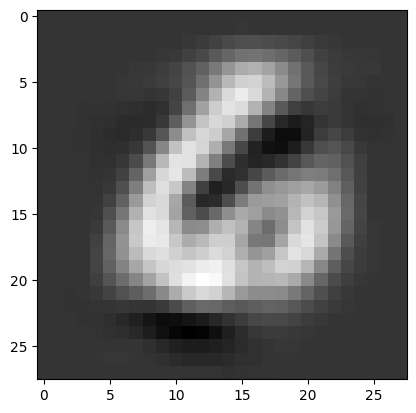

In [ ]:
out_img = torch.squeeze(output.data)
print(out_img.size())

for i in range(out_img.size()[0]):
  plt.imshow(torch.squeeze(X[i]).numpy(), cmap='gray')
  plt.show()
  plt.imshow(out_img[i].numpy(), cmap='gray')
  plt.show()

# Convolutional Autoencoder
- MNIST dataset
- Convolutional Neural Network
- 2 hidden layers

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# 하이퍼 파라미터 설정
batch_size = 100
learning_rate = 0.0002
num_epoch = 1

In [ ]:
# 데이터
mnist_train = dsets.MNIST('./', train=True, transform=transforms.ToTensor(), download=True)
mnist_test = dsets.MNIST('./', train=False, transform=transforms.ToTensor(), download=True)

In [ ]:
# 데이터로더
train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True)
test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=2, drop_last=True)

In [ ]:
# 모델
class Encoder(nn.Module):
  def __init__(self):
    super(Encoder, self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(1, 16, 3, padding=1), # batch x 16 x 28 x 28
        nn.ReLU(),
        nn.BatchNorm2d(16),
        nn.Conv2d(16, 32, 3, padding=1), # batch x 32 x 28 x 28
        nn.ReLU(),
        nn.BatchNorm2d(32),
        nn.Conv2d(32, 64, 3, padding=1), # batch x 64 x 28 x 28
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.MaxPool2d(2, 2) # batch x 64 x 14 x 14
    )
    self.layer2 = nn.Sequential(
        nn.Conv2d(64, 128, 3, padding=1), # batch x 64 x 14 x 14
        nn.ReLU(),
        nn.BatchNorm2d(128),
        nn.MaxPool2d(2, 2),
        nn.Conv2d(128, 256, 3, padding=1), # batch x 256 x 7 x 7
        nn.ReLU()
    )

  def forward(self, x):
    out = self.layer1(x)
    out = self.layer2(out)
    out = out.view(out.size(0), -1)

    return out

encoder = Encoder()

In [ ]:
class Decoder(nn.Module):
  def __init__(self):
    super(Decoder, self).__init__()
    self.layer1 = nn.Sequential(
        nn.ConvTranspose2d(256, 128, 3, 2, 1, 1), # batch x 128 x 14 x 14
        nn.ReLU(),
        nn.BatchNorm2d(128),
        nn.ConvTranspose2d(128, 64, 3, 1, 1), # batch x 64 x 14 x 14
        nn.ReLU(),
        nn.BatchNorm2d(64)
    )
    self.layer2 = nn.Sequential(
        nn.ConvTranspose2d(64, 16, 3, 1, 1), # batch x 16 x 14 x 14
        nn.ReLU(),
        nn.BatchNorm2d(16),
        nn.ConvTranspose2d(16, 1, 3, 2, 1, 1), # batch x 1 x 28 x 28
        nn.ReLU()
    )

  def forward(self, x):
    out = x.view(batch_size, 256, 7, 7)
    out = self.layer1(out)
    out = self.layer2(out)

    return out

decoder = Decoder()

In [ ]:
# 손실 함수 및 옵티마이저
parameters = list(encoder.parameters()) + list(decoder.parameters())
loss_func = nn.MSELoss()
optimizer = optim.Adam(parameters, lr=learning_rate)

In [ ]:
# 학습
for epoch in range(num_epoch):
  for j, [image, label] in enumerate(train_loader):
    optimizer.zero_grad()

    output = encoder(image)
    output = decoder(output)
    loss = loss_func(output, image)

    loss.backward()
    optimizer.step()

    if j % 10 == 0:
      print(loss)

tensor(0.4890, grad_fn=<MseLossBackward0>)
tensor(0.0957, grad_fn=<MseLossBackward0>)
tensor(0.0762, grad_fn=<MseLossBackward0>)
tensor(0.0561, grad_fn=<MseLossBackward0>)
tensor(0.0509, grad_fn=<MseLossBackward0>)
tensor(0.0428, grad_fn=<MseLossBackward0>)
tensor(0.0378, grad_fn=<MseLossBackward0>)
tensor(0.0337, grad_fn=<MseLossBackward0>)
tensor(0.0297, grad_fn=<MseLossBackward0>)
tensor(0.0282, grad_fn=<MseLossBackward0>)
tensor(0.0268, grad_fn=<MseLossBackward0>)
tensor(0.0235, grad_fn=<MseLossBackward0>)
tensor(0.0244, grad_fn=<MseLossBackward0>)
tensor(0.0214, grad_fn=<MseLossBackward0>)
tensor(0.0216, grad_fn=<MseLossBackward0>)
tensor(0.0184, grad_fn=<MseLossBackward0>)
tensor(0.0174, grad_fn=<MseLossBackward0>)
tensor(0.0147, grad_fn=<MseLossBackward0>)
tensor(0.0134, grad_fn=<MseLossBackward0>)
tensor(0.0117, grad_fn=<MseLossBackward0>)
tensor(0.0117, grad_fn=<MseLossBackward0>)
tensor(0.0108, grad_fn=<MseLossBackward0>)
tensor(0.0099, grad_fn=<MseLossBackward0>)
tensor(0.00

torch.Size([100, 28, 28])


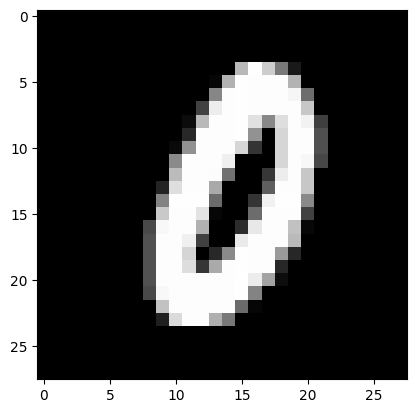

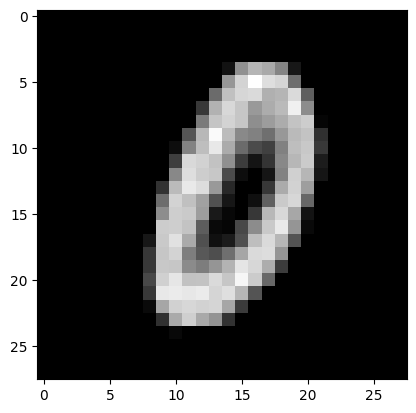

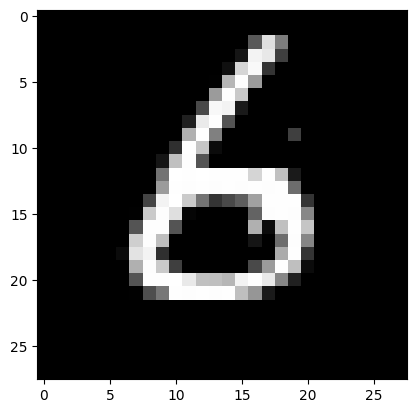

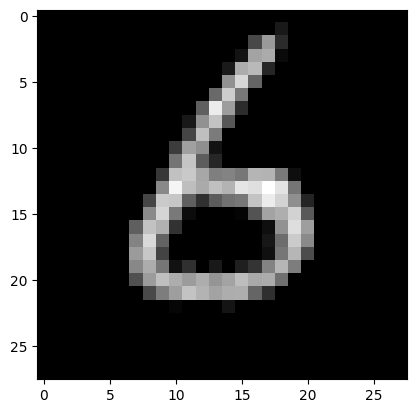

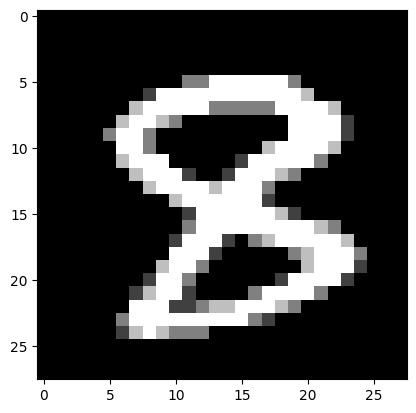

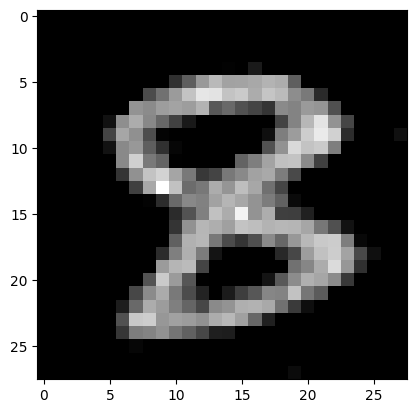

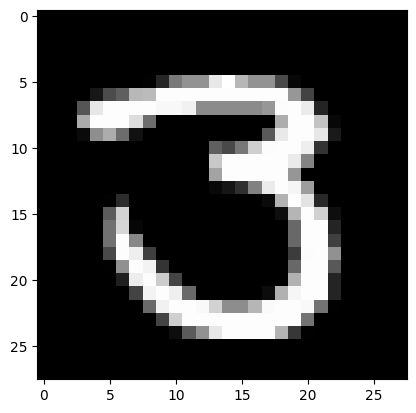

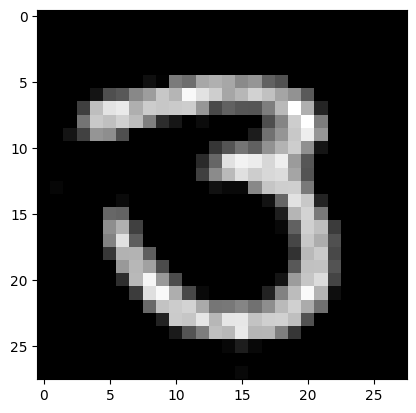

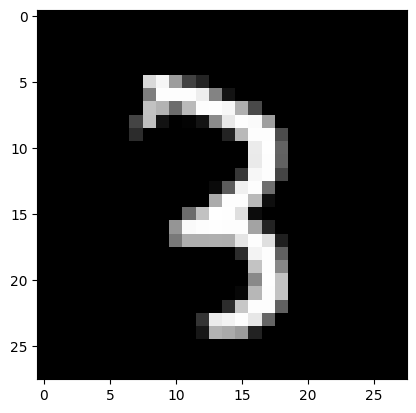

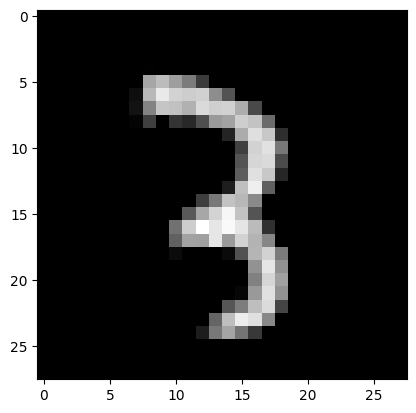

In [ ]:
# 학습 이미지 확인
out_img = torch.squeeze(output.data)
print(out_img.size())

for i in range(5):
  plt.imshow(torch.squeeze(image[i]).numpy(), cmap='gray')
  plt.show()
  plt.imshow(out_img[i].numpy(), cmap='gray')
  plt.show()

In [ ]:
for i in range(1):
  for j, [image, label] in enumerate(test_loader):
    output = encoder(image)
    output = decoder(output)

torch.Size([100, 28, 28])


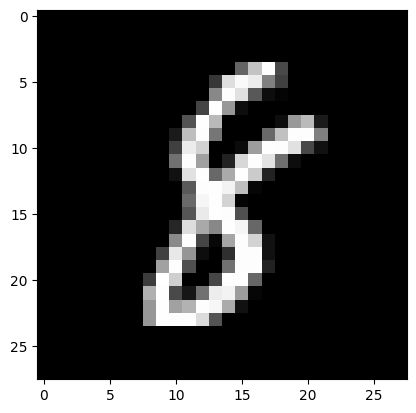

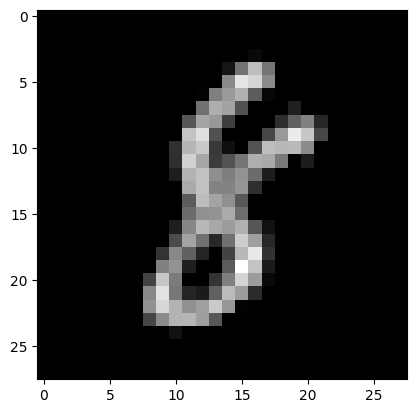

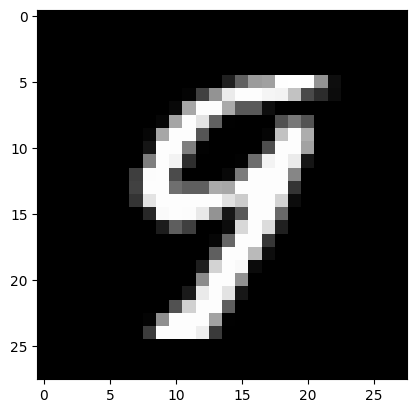

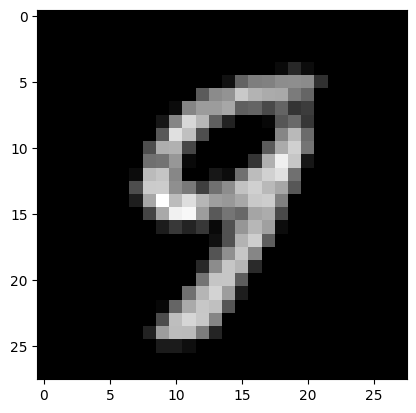

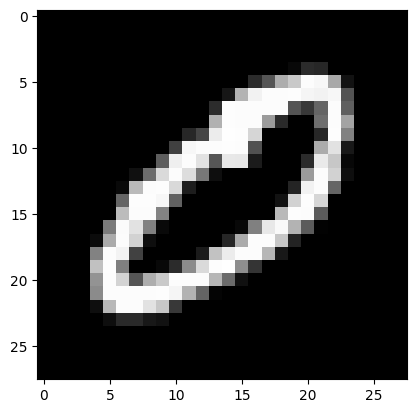

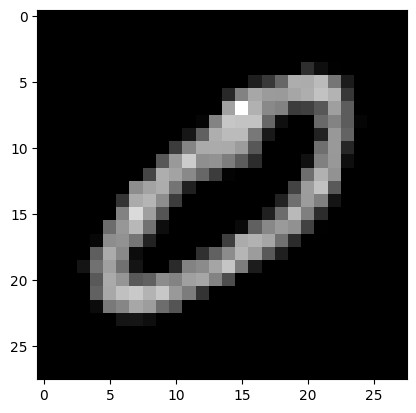

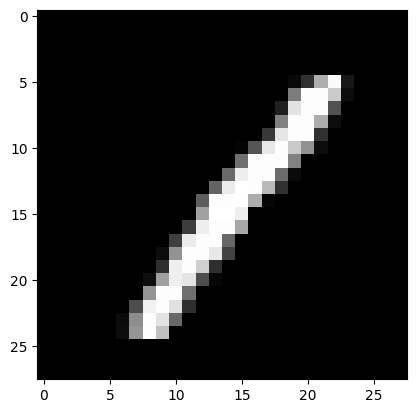

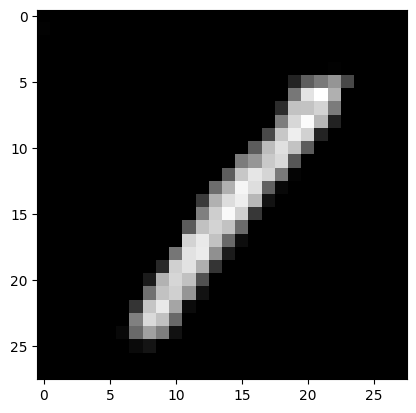

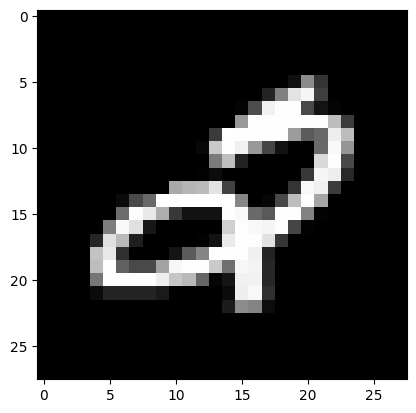

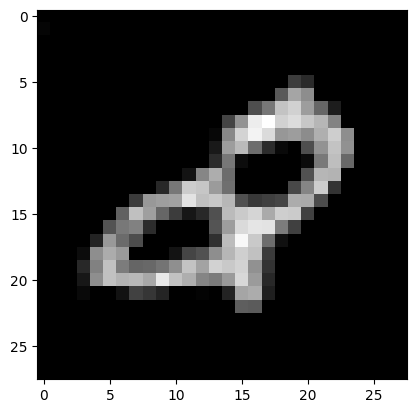

In [ ]:
out_img = torch.squeeze(output.data)
print(out_img.size())

for i in range(5):
  plt.imshow(torch.squeeze(image[i]).numpy(), cmap='gray')
  plt.show()
  plt.imshow(out_img[i].numpy(), cmap='gray')
  plt.show()

# Convolutional Denoising Autoencoder
- MNIST dataset
- Convolutional Neural Network
- 2 hidden layers

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# 하이퍼 파라미터 설정
batch_size = 100
learning_rate = 0.0002
num_epoch = 1

In [ ]:
# 데이터
mnist_train = dsets.MNIST('./', train=True, transform=transforms.ToTensor(), download=True)
mnist_test = dsets.MNIST('./', train=False, transform=transforms.ToTensor(), download=True)

In [ ]:
# 데이터로더 설정
train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True)
test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=2, drop_last=True)

In [ ]:
# 모델
class Encoder(nn.Module):
  def __init__(self):
    super(Encoder, self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(1, 16, 3, padding=1), # batch x 16 x 28 x 28
        nn.ReLU(),
        nn.BatchNorm2d(16),
        nn.Conv2d(16, 32, 3, padding=1), # batch x 32 x 28 x 28
        nn.ReLU(),
        nn.BatchNorm2d(32),
        nn.Conv2d(32, 64, 3, padding=1), # batch x 32 x 28 x 28
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.MaxPool2d(2, 2) # batch x 64 x 14 x 14
    )
    self.layer2 = nn.Sequential(
        nn.Conv2d(64, 128, 3, padding=1), # batch x 64 x 14 x 14
        nn.ReLU(),
        nn.BatchNorm2d(128),
        nn.MaxPool2d(2, 2),
        nn.Conv2d(128, 256, 3, padding=1), # batch x 64 x 7 x 7
        nn.ReLU()
    )

  def forward(self, x):
    out = self.layer1(x)
    out = self.layer2(out)
    out = out.view(out.size(0), -1)
    return out

encoder = Encoder()

In [ ]:
class Decoder(nn.Module):
  def __init__(self):
    super(Decoder, self).__init__()
    self.layer1 = nn.Sequential(
        nn.ConvTranspose2d(256, 128, 3, 2, 1, 1),
        nn.ReLU(),
        nn.BatchNorm2d(128),
        nn.ConvTranspose2d(128, 64, 3, 1, 1),
        nn.ReLU(),
        nn.BatchNorm2d(64)
    )
    self.layer2 = nn.Sequential(
        nn.ConvTranspose2d(64, 16, 3, 1, 1),
        nn.ReLU(),
        nn.BatchNorm2d(16),
        nn.ConvTranspose2d(16, 1, 3, 2, 1, 1),
        nn.ReLU()
    )

  def forward(self, x):
    out = x.view(x.size(0), 256, 7, 7)
    out = self.layer1(out)
    out = self.layer2(out)
    return out


decoder = Decoder()

In [ ]:
# 손실 함수 및 옵티마이저
parameters = list(encoder.parameters()) + list(decoder.parameters())
loss_func = nn.MSELoss()
optimizer = optim.Adam(parameters, lr=learning_rate)

In [ ]:
# 학습
for epoch in range(num_epoch):
  for j, [image, label] in enumerate(train_loader):
    noise = init.normal_(torch.FloatTensor(batch_size, 1, 28, 28), 0, 0.1)

    optimizer.zero_grad()

    noise_image = image + noise
    output = encoder(noise_image)
    output = decoder(output)
    loss = loss_func(output, image)

    loss.backward()
    optimizer.step()

    if j % 100 == 0:
      print(loss)

KeyboardInterrupt: 

torch.Size([100, 28, 28])


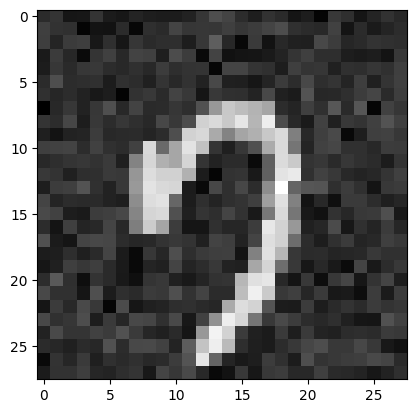

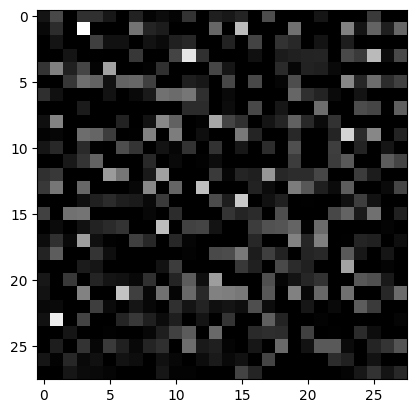

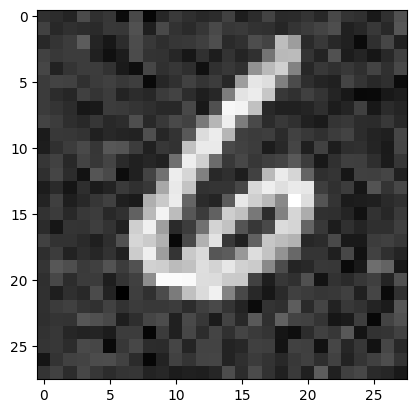

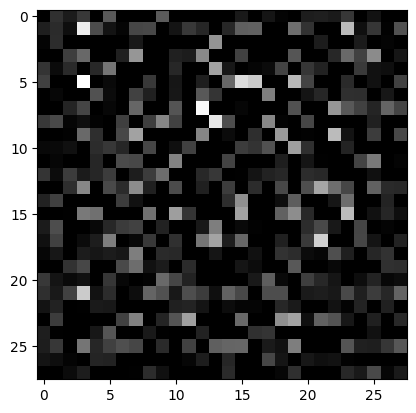

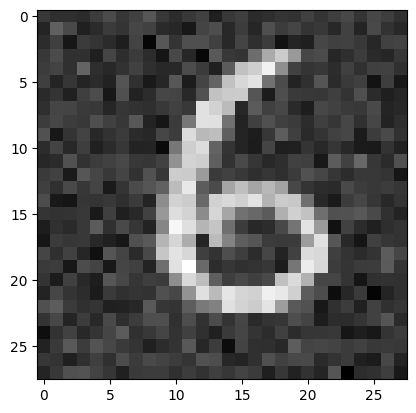

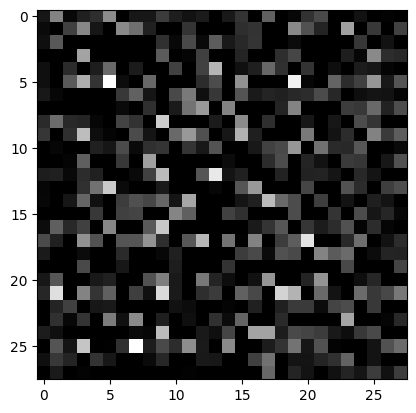

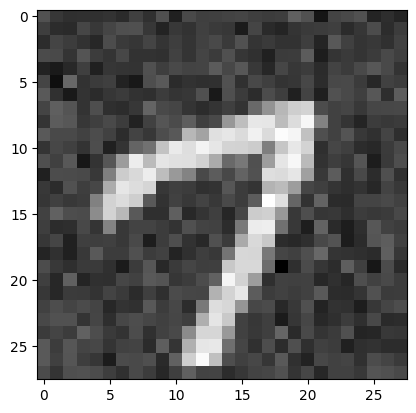

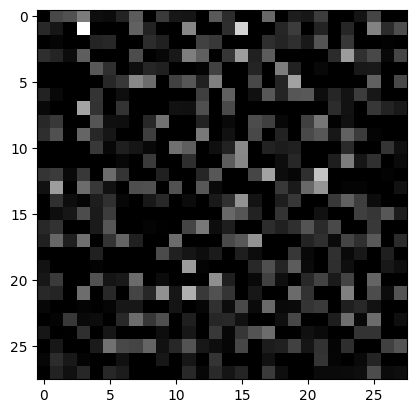

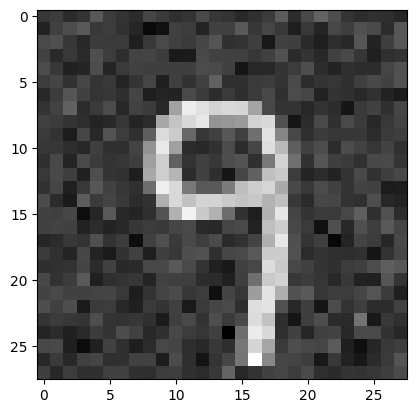

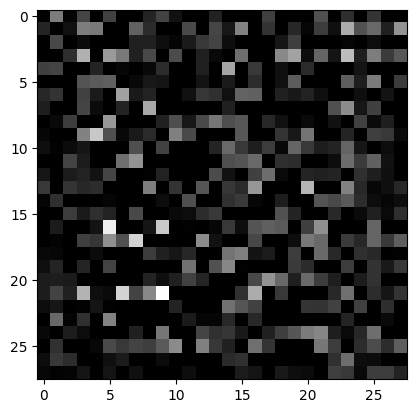

In [ ]:
# 학습 이미지 확인
out_img = torch.squeeze(output.data)
print(out_img.size())

for i in range(5):
  plt.imshow(torch.squeeze(noise_image.data[i]).numpy(), cmap='gray')
  plt.show()
  plt.imshow(out_img[i].numpy(), cmap='gray')
  plt.show()

# Variational Autoencoder
- MNIST dataset
- Variational Inference
- Auto-Encoding Variational Bayes

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 하이퍼 파라미터 설정
batch_size = 128
learning_rate = 0.0005
num_epoch = 10
hidden_size = 50

In [3]:
# 데이터
mnist_train = dsets.MNIST('./', train=True, transform=transforms.ToTensor(), download=True)
mnist_test = dsets.MNIST('./', train=False, transform=transforms.ToTensor(), download=True)

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 9.91M/9.91M [00:00<00:00, 41.0MB/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.24MB/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 1.65M/1.65M [00:00<00:00, 10.6MB/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 4.54k/4.54k [00:00<00:00, 8.54MB/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [4]:
# 데이터 로더
train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True)
test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=2, drop_last=True)

In [13]:
# 모델
class Encoder(nn.Module):
  def __init__(self):
    super(Encoder, self).__init__()
    self.fc1_1 = nn.Linear(784, hidden_size)
    self.fc1_2 = nn.Linear(784, hidden_size)
    self.relu = nn.ReLU()

  def encode(self, x):
    x = x.view(batch_size, -1)
    mu = self.relu(self.fc1_1(x))
    log_var = self.relu(self.fc1_2(x))
    return mu, log_var

  def reparametrize(self, mu, logvar):
    std = logvar.mul(0.5).exp_()

    eps = torch.FloatTensor(std.size()).normal_()

    return eps.mul(std).add_(mu)

  def forward(self, x):
    mu, logvar = self.encode(x)
    reparam = self.reparametrize(mu, logvar)

    return mu, logvar, reparam


encoder = Encoder()

In [15]:
class Decoder(nn.Module):
  def __init__(self):
    super(Decoder, self).__init__()
    self.fc1 = nn.Linear(hidden_size, 784)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    out = self.fc1(x)
    out = self.sigmoid(out)
    out = out.view(batch_size, 1, 28, 28)

    return out

decoder = Decoder()

In [7]:
# 손실 함수 및 옵티마이저
reconstruction_function = nn.BCELoss(size_average=False)

def loss_function(recon_x, x, mu, logvar):
  BCE = reconstruction_function(recon_x, x)

  KLD_element = mu.pow(2).add_(logvar.exp()).mul_(-1).add_(1).add_(logvar)
  KLD = torch.sum(KLD_element).mul_(-0.5)

  return BCE + KLD

parameters = list(encoder.parameters()) + list(decoder.parameters())
optimizer = optim.Adam(parameters, lr=learning_rate)

/usr/local/lib/python3.11/dist-packages/torch/nn/_reduction.py:51: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [18]:
# 학습

for epoch in range(num_epoch):
  for j, [image, label] in enumerate(train_loader):
    optimizer.zero_grad()

    mu, log_var, reparam = encoder(image)
    output = decoder(reparam)

    loss = loss_function(output, image, mu, log_var)

    loss.backward()
    optimizer.step()

    if j % 100 == 0:
      print(loss)

tensor(73735.3984, grad_fn=<AddBackward0>)
tensor(73820.8203, grad_fn=<AddBackward0>)
tensor(74011.5078, grad_fn=<AddBackward0>)
tensor(73973.8125, grad_fn=<AddBackward0>)
tensor(73974.0234, grad_fn=<AddBackward0>)
tensor(73837.6875, grad_fn=<AddBackward0>)
tensor(73969.5156, grad_fn=<AddBackward0>)
tensor(73850.9922, grad_fn=<AddBackward0>)
tensor(74190.9219, grad_fn=<AddBackward0>)
tensor(74002.8047, grad_fn=<AddBackward0>)
tensor(73987.3984, grad_fn=<AddBackward0>)
tensor(73965.9062, grad_fn=<AddBackward0>)
tensor(73858.6719, grad_fn=<AddBackward0>)
tensor(73825.7422, grad_fn=<AddBackward0>)
tensor(73918.8359, grad_fn=<AddBackward0>)
tensor(74045.7578, grad_fn=<AddBackward0>)
tensor(73788.0703, grad_fn=<AddBackward0>)
tensor(73984.9219, grad_fn=<AddBackward0>)
tensor(74110.4375, grad_fn=<AddBackward0>)
tensor(73866.3281, grad_fn=<AddBackward0>)
tensor(74039.7969, grad_fn=<AddBackward0>)
tensor(73737.9375, grad_fn=<AddBackward0>)
tensor(74009.4219, grad_fn=<AddBackward0>)
tensor(7382

torch.Size([128, 28, 28])


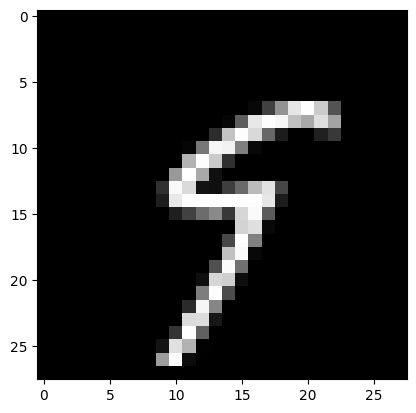

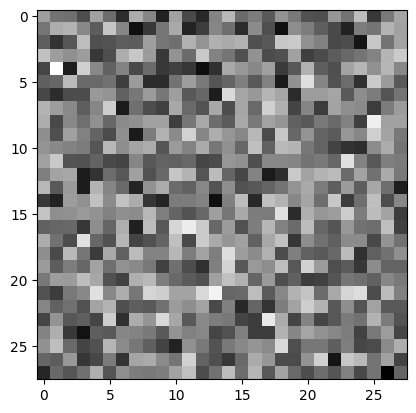

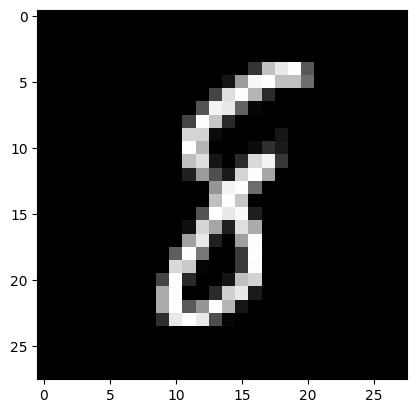

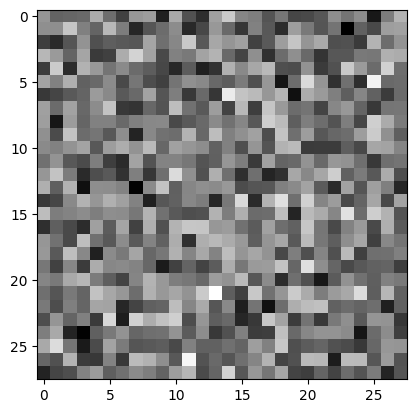

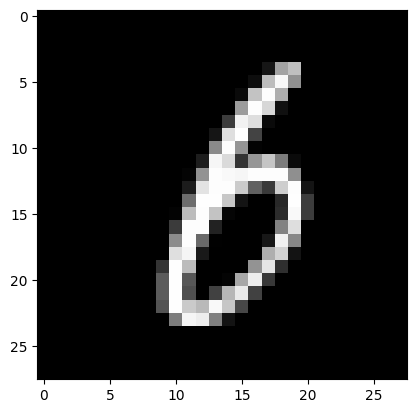

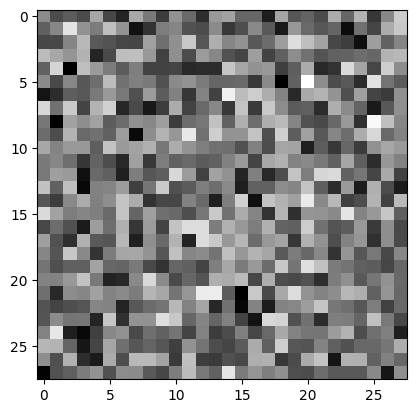

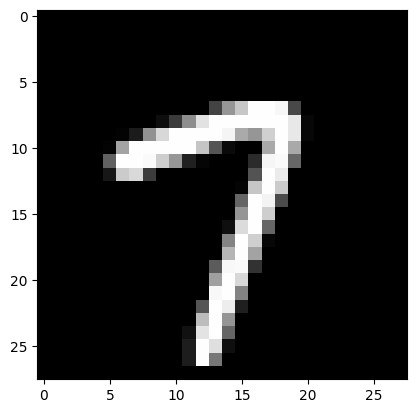

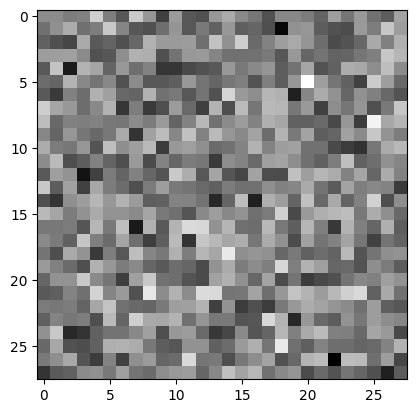

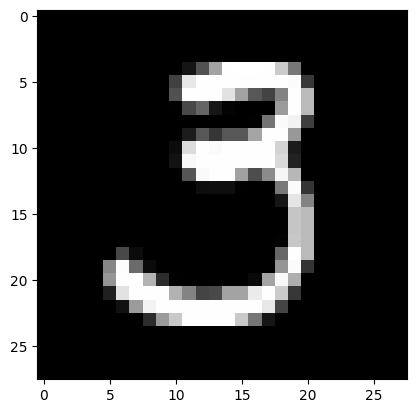

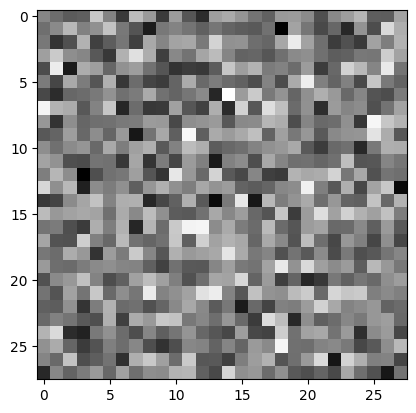

In [22]:
# 학습 이미지 확인
out_img = torch.squeeze(output.data)
print(out_img.size())

for i in range(5):
  plt.imshow(torch.squeeze(image[i]).data.numpy(), cmap='gray')
  plt.show()
  plt.imshow(out_img[i].numpy(), cmap='gray')
  plt.show()

In [21]:
for i in range(1):
  for j, [image, label] in enumerate(test_loader):
    output, mean, var = encoder(image)
    output = decoder(output)

    if j % 10 == 0:
      print(loss)

tensor(73994.0078, grad_fn=<AddBackward0>)
tensor(73994.0078, grad_fn=<AddBackward0>)
tensor(73994.0078, grad_fn=<AddBackward0>)
tensor(73994.0078, grad_fn=<AddBackward0>)
tensor(73994.0078, grad_fn=<AddBackward0>)
tensor(73994.0078, grad_fn=<AddBackward0>)
tensor(73994.0078, grad_fn=<AddBackward0>)
tensor(73994.0078, grad_fn=<AddBackward0>)


torch.Size([128, 28, 28])


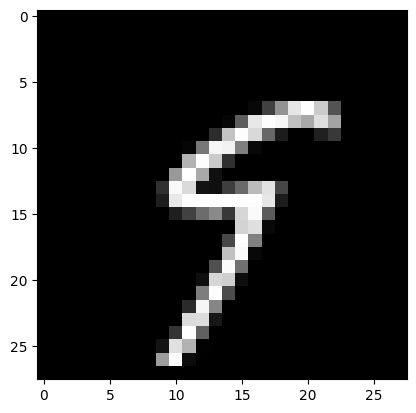

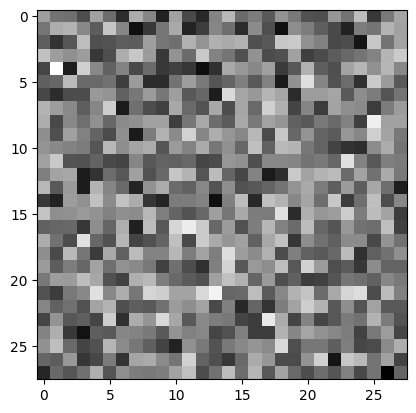

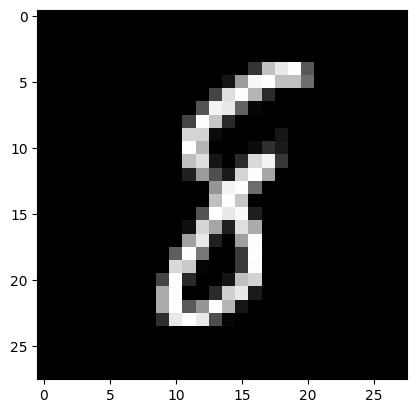

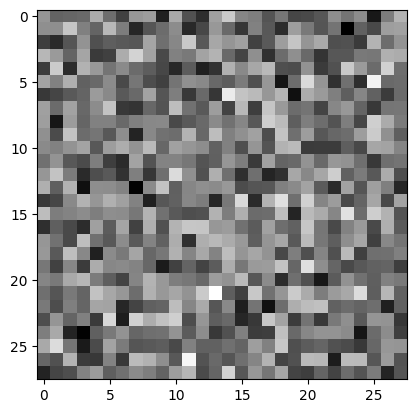

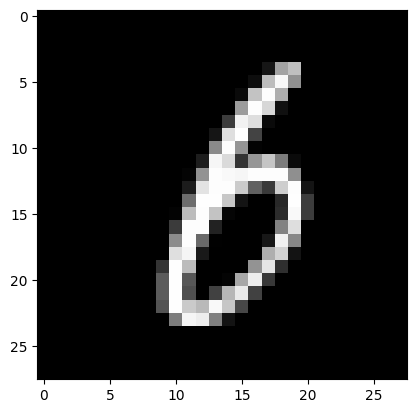

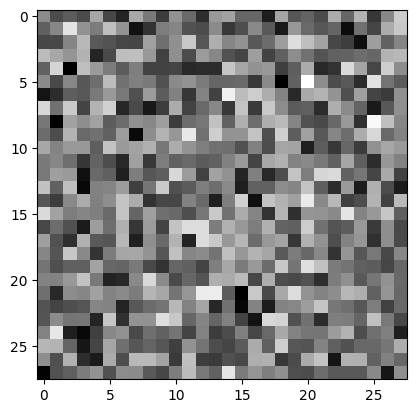

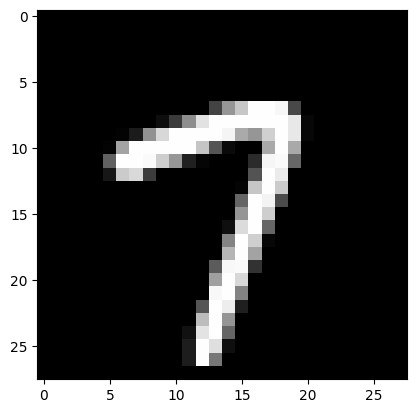

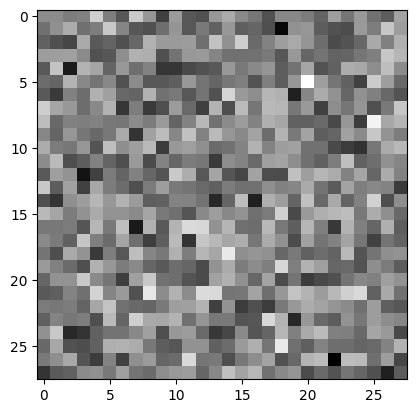

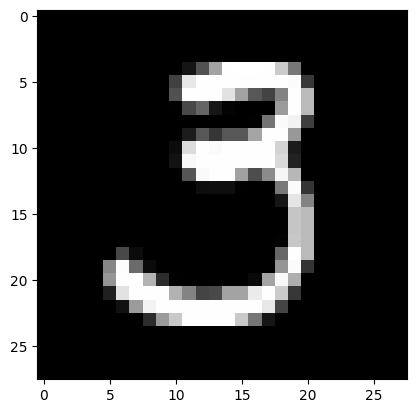

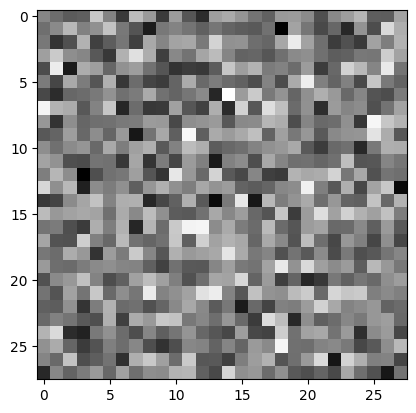

In [23]:
out_img = torch.squeeze(output.data)
print(out_img.size())

for i in range(5):
  plt.imshow(torch.squeeze(image[i]).data.numpy(), cmap='gray')
  plt.show()
  plt.imshow(out_img[i].numpy(), cmap='gray')
  plt.show()

# Convolutional Variational Autoencoder
- MNIST dataset
- Variational Inference
- Convolutional
- Auto-Encoding Variational Bayes

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 하이퍼 파라미터 설정

batch_size = 128
learning_rate = 0.0005
num_epoch = 20
hidden_size = 100

In [3]:
# 데이터
mnist_train = dsets.MNIST('./', train=True, transform=transforms.ToTensor(), download=True)
mnist_test = dsets.MNIST('./', train=False, transform=transforms.ToTensor(), download=True)

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 9.91M/9.91M [00:00<00:00, 39.5MB/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.29MB/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 1.65M/1.65M [00:00<00:00, 10.8MB/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.10MB/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [4]:
# 데이터 로더 설정
train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True)
test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=2, drop_last=True)

In [5]:
# 모델
class Encoder(nn.Module):
  def __init__(self):
    super(Encoder, self).__init__()
    self.fc1 = nn.Sequential(
        nn.Conv2d(1, 8, 3, padding=1), # batch x 8 x 28 x 28
        nn.BatchNorm2d(8),
        nn.ReLU(),
        nn.MaxPool2d(2, 2),
        nn.Conv2d(8, 16, 3, padding=1), # batch x 16 x 14 x 14
        nn.BatchNorm2d(16),
        nn.ReLU(),
        nn.MaxPool2d(2, 2),
        nn.Conv2d(16, 32, 3, padding=1), # batch x 32 x 7 x 7
        nn.ReLU()
    )
    self.fc2_1 = nn.Sequential(
        nn.Linear(32 * 7 * 7, 800),
        nn.Linear(800, hidden_size)
    )
    self.fc2_2 = nn.Sequential(
        nn.Linear(32 * 7 * 7, 800),
        nn.Linear(800, hidden_size)
    )
    self.relu = nn.ReLU()

  def encode(self, x):
    out = self.fc1(x)
    out = out.view(out.size(0), -1)
    out = self.relu(out)
    mu = self.fc2_1(out)
    log_var = self.fc2_2(out)

    return mu, log_var

  def reparametrize(self, mu, logvar):
    std = logvar.mul(0.5).exp_()

    eps = torch.FloatTensor(std.size()).normal_()

    return eps.mul(std).add_(mu)

  def forward(self, x):
    mu, logvar = self.encode(x)
    reparam = self.reparametrize(mu, logvar)

    return mu, logvar, reparam

encoder = Encoder()

In [6]:
class Decoder(nn.Module):
  def __init__(self):
    super(Decoder, self).__init__()
    self.fc1 = nn.Sequential(
        nn.Linear(hidden_size, 800),
        nn.BatchNorm1d(800),
        nn.ReLU(),
        nn.Linear(800, 1568),
        nn.ReLU()
    )
    self.fc2 = nn.Sequential(
        nn.ConvTranspose2d(32, 16, 3, 2, 1, 1),
        nn.ReLU(),
        nn.BatchNorm2d(16),
        nn.ConvTranspose2d(16, 8, 3, 2, 1, 1),
        nn.ReLU(),
        nn.BatchNorm2d(8),
        nn.ConvTranspose2d(8, 1, 3, 1, 1),
        nn.BatchNorm2d(1)
    )
    self.sigmoid = nn.Sigmoid()
    self.relu = nn.ReLU()

  def forward(self, x):
    out = self.fc1(x)
    out = self.relu(out)
    out = out.view(batch_size, 32, 7, 7)
    out = self.fc2(out)
    out = self.sigmoid(out)
    out = out.view(batch_size, 1, 28, 28)

    return out

decoder = Decoder()

In [9]:
# 손실 함수 및 옵티마이저
reconstruction_function = nn.BCELoss(size_average=False)

def loss_function(recon_x, x, mu, logvar):
  BCE = reconstruction_function(recon_x, x)

  KLD_element = mu.pow(2).add_(logvar.exp()).mul_(-1).add_(1).add_(logvar)
  KLD = torch.sum(KLD_element).mul_(-0.5)

  return BCE + KLD

parameters = list(encoder.parameters()) + list(decoder.parameters())
optimizer = optim.Adam(parameters, lr=learning_rate)

/usr/local/lib/python3.11/dist-packages/torch/nn/_reduction.py:51: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [10]:
# 학습
for epoch in range(num_epoch):
  for j, [image, label] in enumerate(train_loader):
    optimizer.zero_grad()

    mu, log_var, reparam = encoder(image)
    output = decoder(reparam)

    loss = loss_function(output, image, mu, log_var)

    loss.backward()
    optimizer.step()

    if j % 100 == 0:
      print(loss)

tensor(81079.0703, grad_fn=<AddBackward0>)
tensor(58289.5742, grad_fn=<AddBackward0>)
tensor(54741.5820, grad_fn=<AddBackward0>)
tensor(52683.5859, grad_fn=<AddBackward0>)
tensor(49917.9336, grad_fn=<AddBackward0>)
tensor(48289.3906, grad_fn=<AddBackward0>)
tensor(46074.2227, grad_fn=<AddBackward0>)
tensor(44231.8398, grad_fn=<AddBackward0>)
tensor(42218.2891, grad_fn=<AddBackward0>)
tensor(40867.5625, grad_fn=<AddBackward0>)
tensor(39926.3008, grad_fn=<AddBackward0>)
tensor(38713.5430, grad_fn=<AddBackward0>)
tensor(37850.5703, grad_fn=<AddBackward0>)
tensor(36199.1016, grad_fn=<AddBackward0>)
tensor(34085.9531, grad_fn=<AddBackward0>)
tensor(34592.8672, grad_fn=<AddBackward0>)
tensor(33082.0312, grad_fn=<AddBackward0>)
tensor(31481.7109, grad_fn=<AddBackward0>)
tensor(31764.0371, grad_fn=<AddBackward0>)
tensor(30051.8242, grad_fn=<AddBackward0>)
tensor(29662.5020, grad_fn=<AddBackward0>)
tensor(29185.8789, grad_fn=<AddBackward0>)
tensor(28263.0352, grad_fn=<AddBackward0>)
tensor(2770

torch.Size([128, 28, 28])


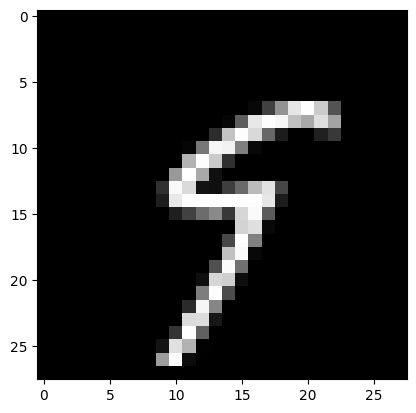

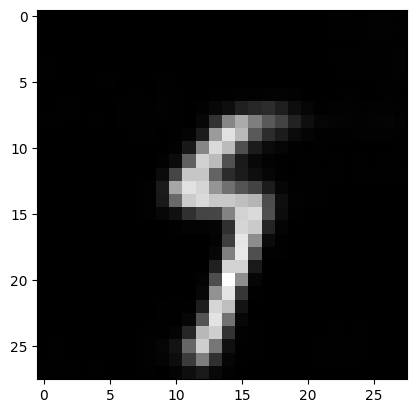

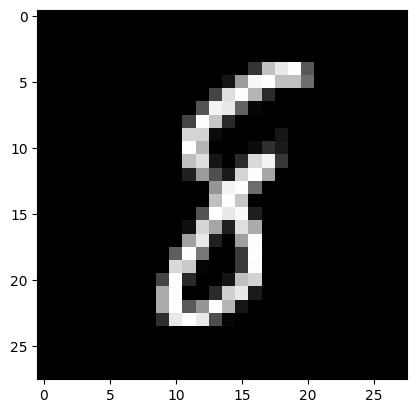

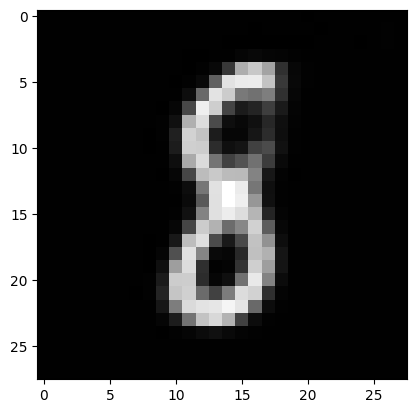

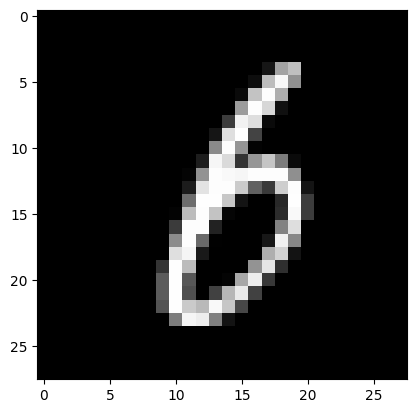

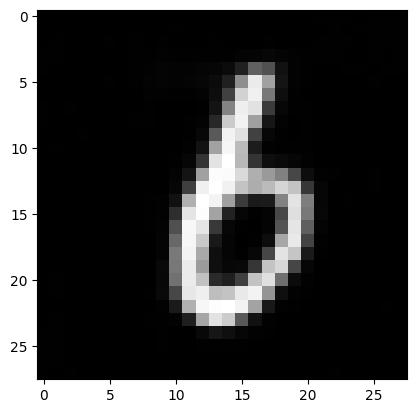

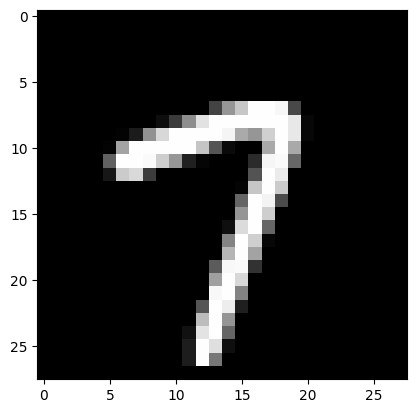

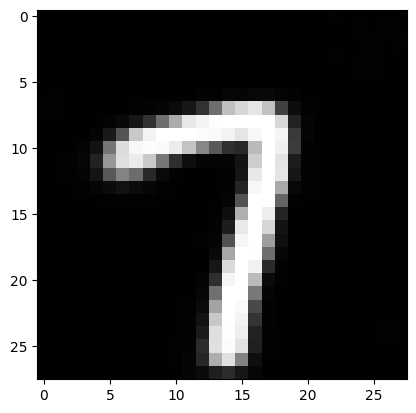

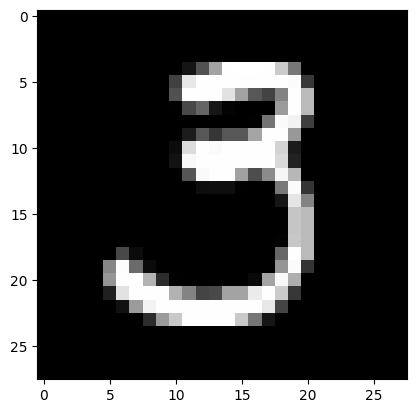

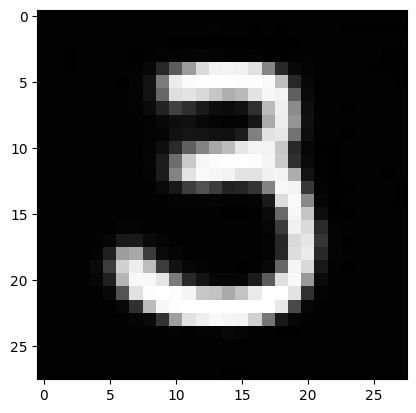

In [14]:
# 학습 이미지 확인
out_img = torch.squeeze(output.data)
print(out_img.size())

for i in range(5):
  plt.imshow(torch.squeeze(image[i]).data.numpy(), cmap='gray')
  plt.show()
  plt.imshow(torch.squeeze(out_img[i]).numpy(), cmap='gray')
  plt.show()

In [12]:
for i in range(1):
  for j, [image, label] in enumerate(test_loader):
    output, mean, var = encoder(image)
    output = decoder(output)

    if j % 10 == 0:
      print(loss)

tensor(14257.4277, grad_fn=<AddBackward0>)
tensor(14257.4277, grad_fn=<AddBackward0>)
tensor(14257.4277, grad_fn=<AddBackward0>)
tensor(14257.4277, grad_fn=<AddBackward0>)
tensor(14257.4277, grad_fn=<AddBackward0>)
tensor(14257.4277, grad_fn=<AddBackward0>)
tensor(14257.4277, grad_fn=<AddBackward0>)
tensor(14257.4277, grad_fn=<AddBackward0>)


torch.Size([128, 28, 28])


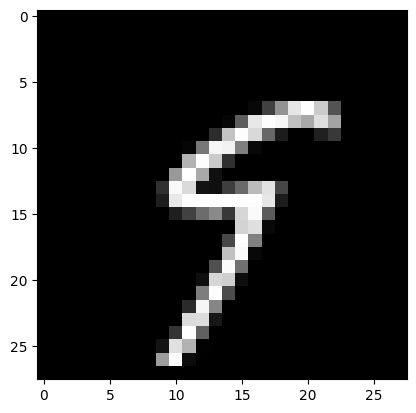

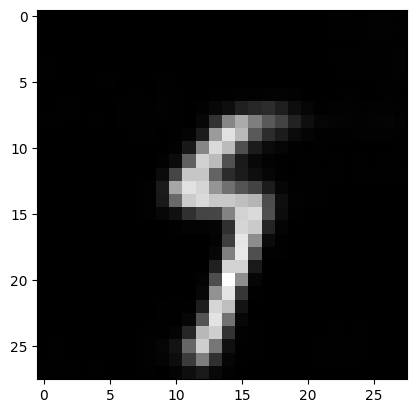

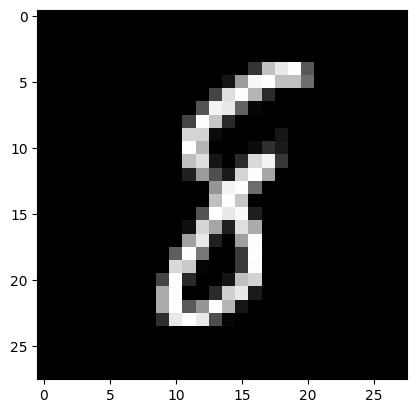

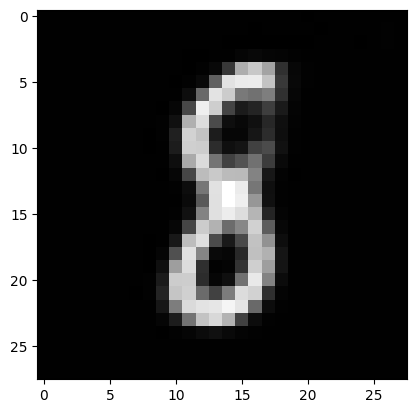

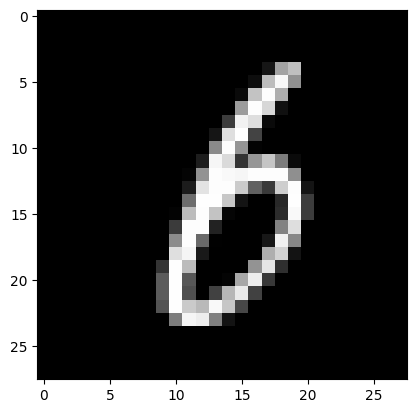

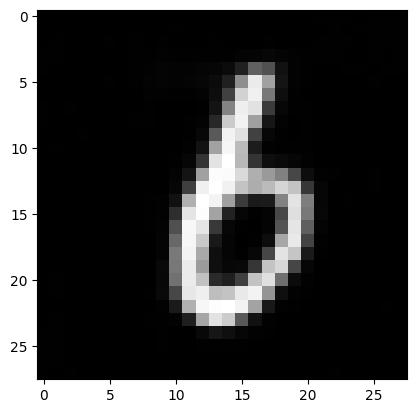

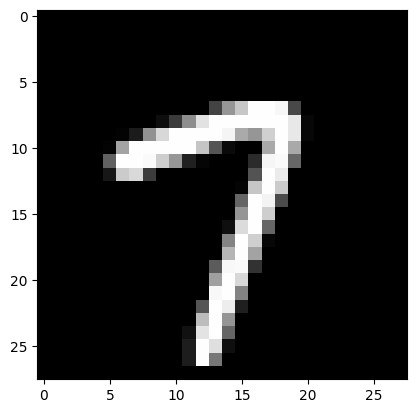

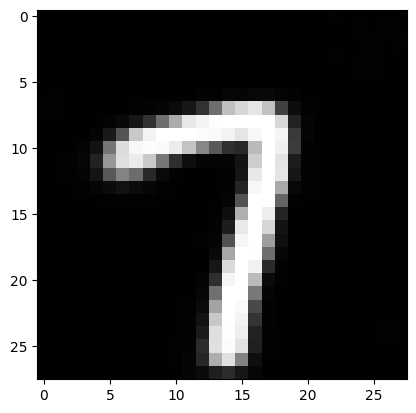

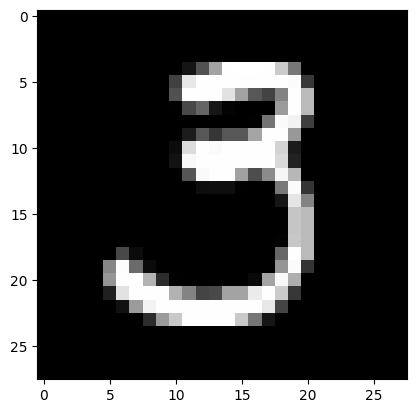

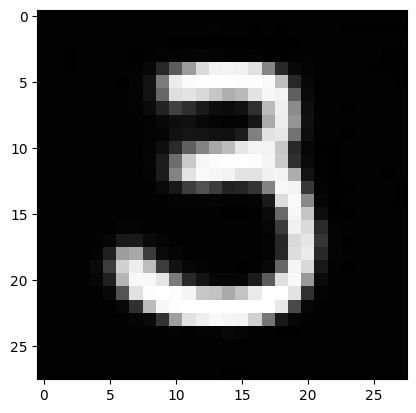

In [13]:
out_img = torch.squeeze(output.data)
print(out_img.size())

for i in range(5):
  plt.imshow(torch.squeeze(image[i]).data.numpy(), cmap='gray')
  plt.show()
  plt.imshow(out_img[i].numpy(), cmap='gray')
  plt.show()

# Autoencoder t-SNE
- MNIST
- Neural Network
- 1 hidden layers

In [15]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [17]:
# 하이퍼 파라미터 설정
batch_size = 16
learning_rate = 0.0002
num_epoch = 5

In [19]:
# 데이터
mnist_train = dsets.MNIST('./', train=True, transform=transforms.ToTensor(), download=True)
mnist_test = dsets.MNIST('./', train=False, transform=transforms.ToTensor(), download=True)

mnist_test[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [20]:
# 데이터 로더 설정
train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True)
test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=2, drop_last=True)


In [21]:
# 모델
class Autoencoder(nn.Module):
  def __init__(self):
    super(Autoencoder, self).__init__()
    self.encoder = nn.Linear(28 * 28, 20)
    self.decoder = nn.Linear(20, 28 * 28)

  def forward(self, x):
    x = x.view(batch_size, -1)
    encoded = self.encoder(x)
    out = self.decoder(encoded).view(batch_size, 1, 28, 28)

    return encoded, out

model = Autoencoder()

In [22]:
# 손실 함수 및 옵티마이저
loss_func = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [24]:
# 학습
loss_arr = []

for epoch in range(num_epoch):
  for j, [image, label] in enumerate(train_loader):
    optimizer.zero_grad()
    _, output = model(image)
    loss = loss_func(output, image)
    loss.backward()
    optimizer.step()

    if j % 1000 == 0:
      print(loss)
      loss_arr.append(loss.data.numpy())

tensor(0.1467, grad_fn=<MseLossBackward0>)
tensor(0.0541, grad_fn=<MseLossBackward0>)
tensor(0.0460, grad_fn=<MseLossBackward0>)
tensor(0.0377, grad_fn=<MseLossBackward0>)
tensor(0.0360, grad_fn=<MseLossBackward0>)
tensor(0.0332, grad_fn=<MseLossBackward0>)
tensor(0.0314, grad_fn=<MseLossBackward0>)
tensor(0.0291, grad_fn=<MseLossBackward0>)
tensor(0.0308, grad_fn=<MseLossBackward0>)
tensor(0.0286, grad_fn=<MseLossBackward0>)
tensor(0.0252, grad_fn=<MseLossBackward0>)
tensor(0.0283, grad_fn=<MseLossBackward0>)
tensor(0.0260, grad_fn=<MseLossBackward0>)
tensor(0.0231, grad_fn=<MseLossBackward0>)
tensor(0.0229, grad_fn=<MseLossBackward0>)
tensor(0.0235, grad_fn=<MseLossBackward0>)
tensor(0.0247, grad_fn=<MseLossBackward0>)
tensor(0.0287, grad_fn=<MseLossBackward0>)
tensor(0.0257, grad_fn=<MseLossBackward0>)
tensor(0.0251, grad_fn=<MseLossBackward0>)


torch.Size([16, 28, 28])


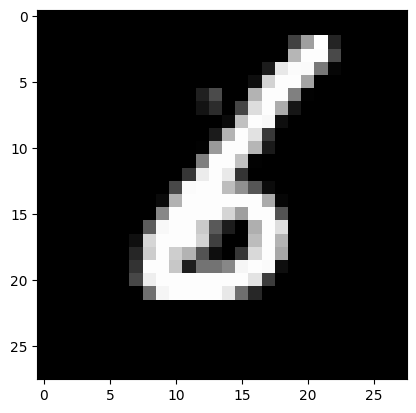

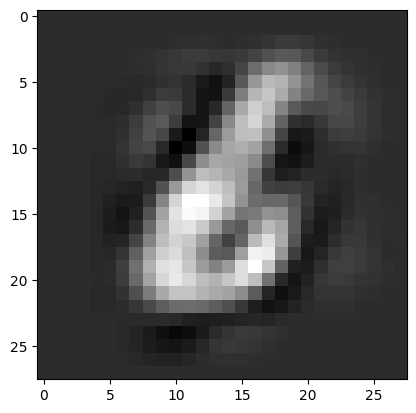

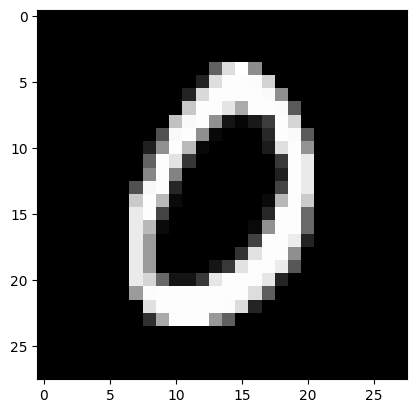

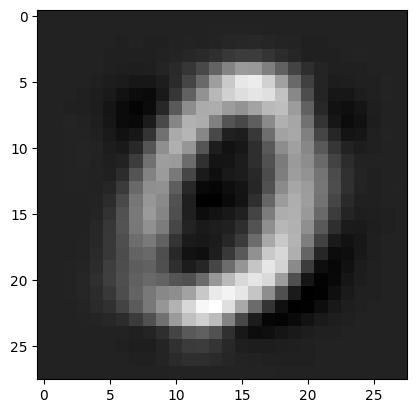

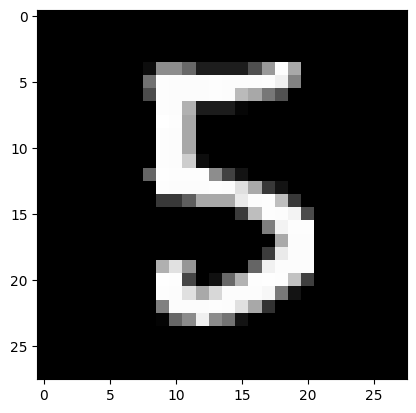

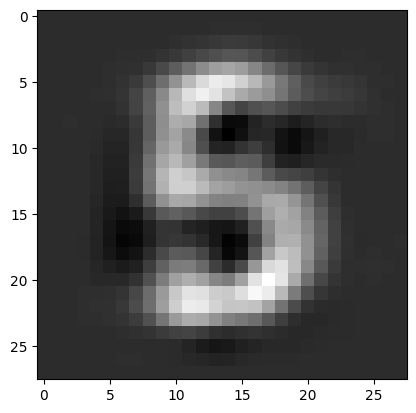

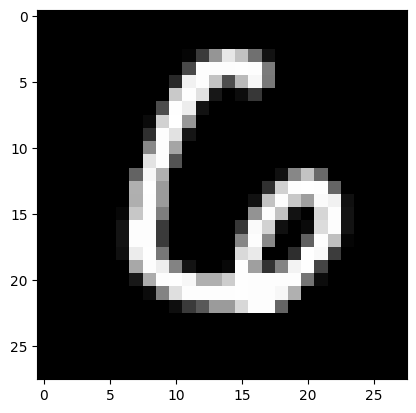

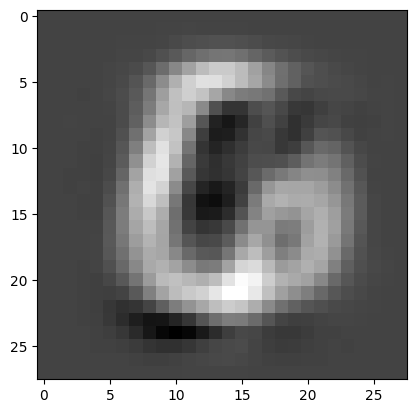

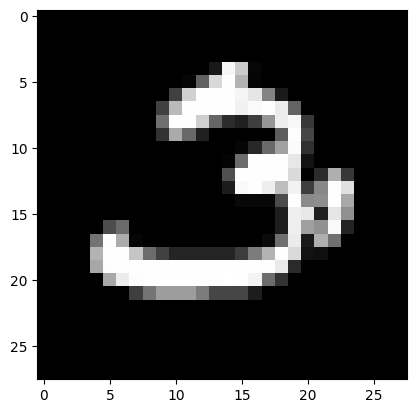

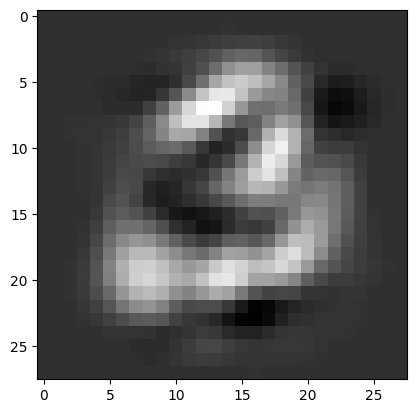

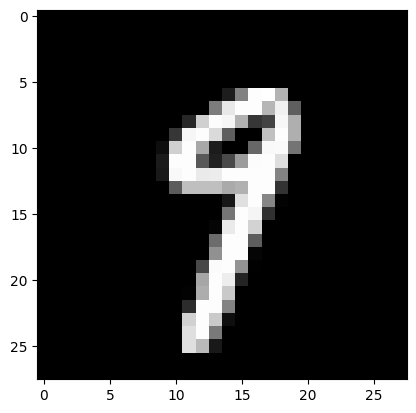

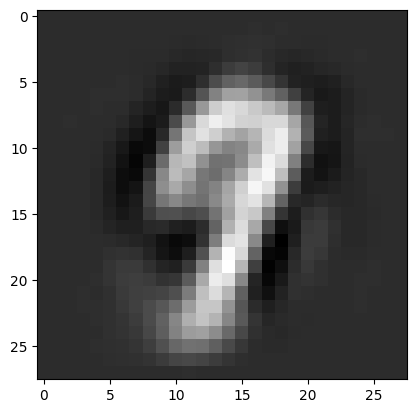

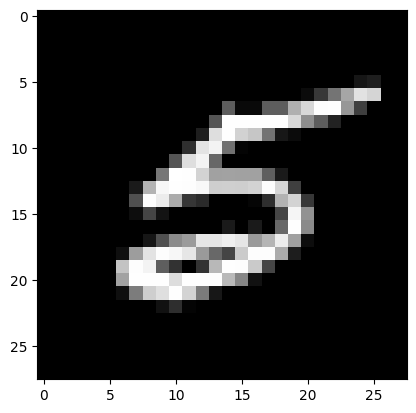

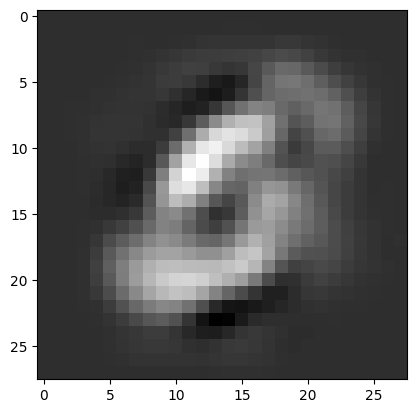

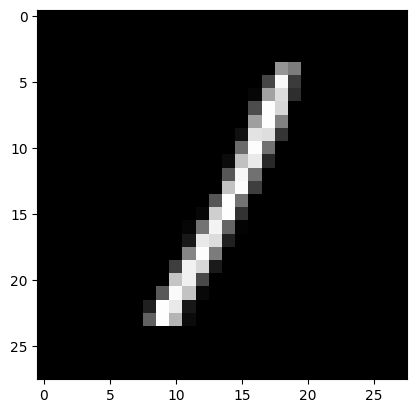

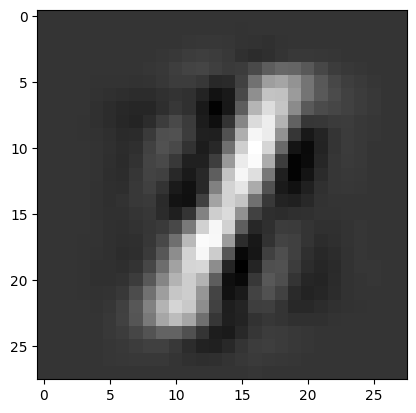

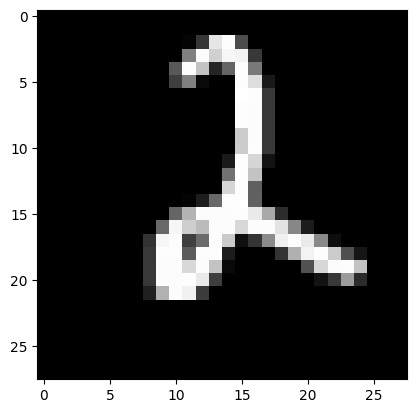

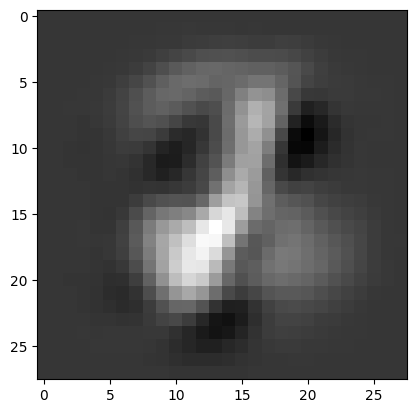

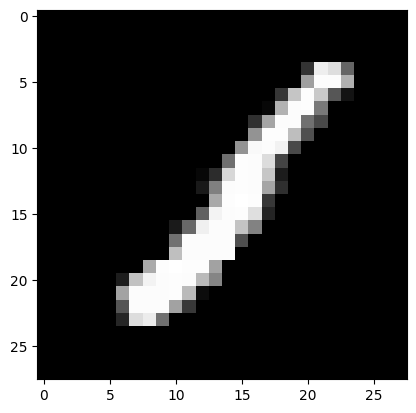

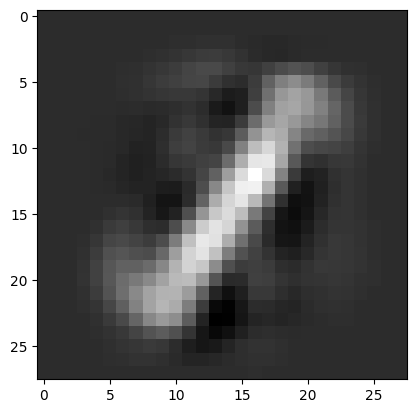

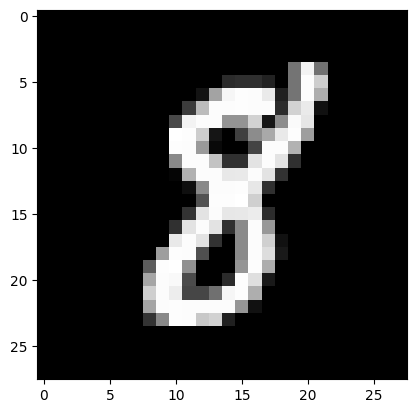

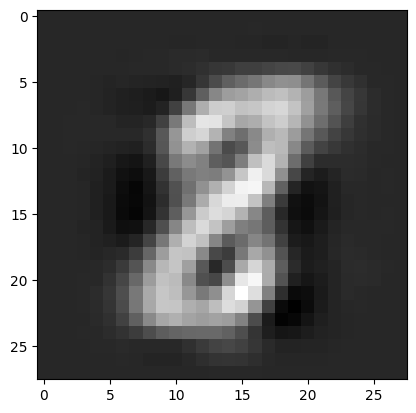

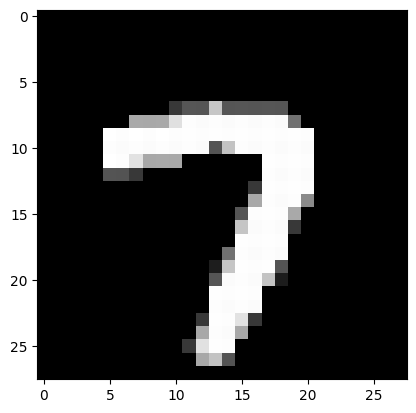

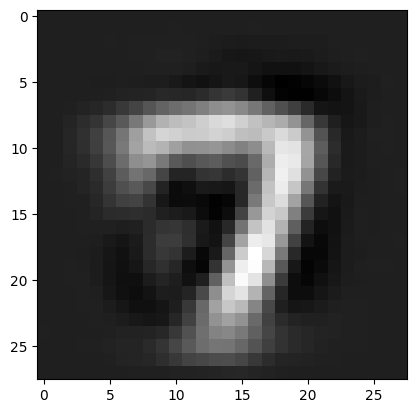

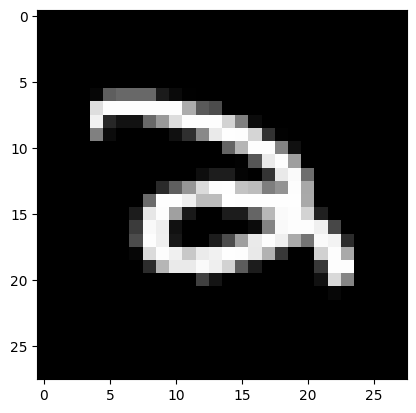

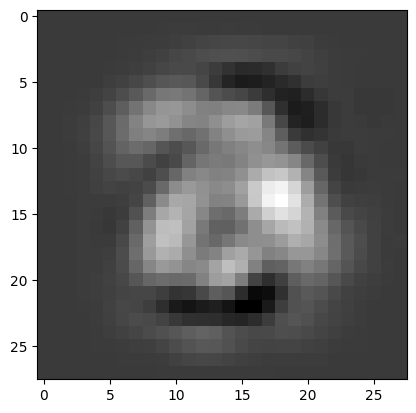

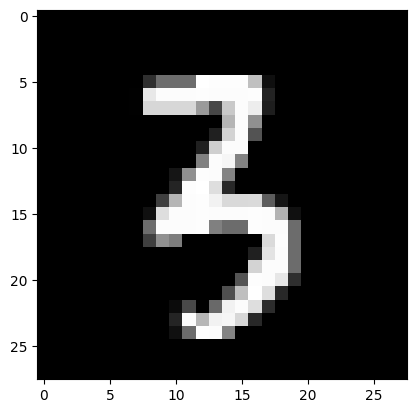

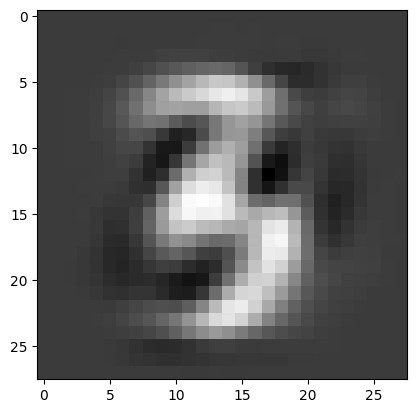

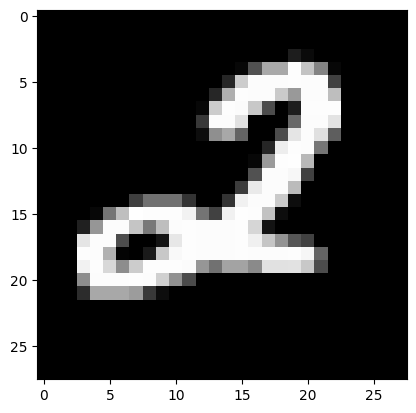

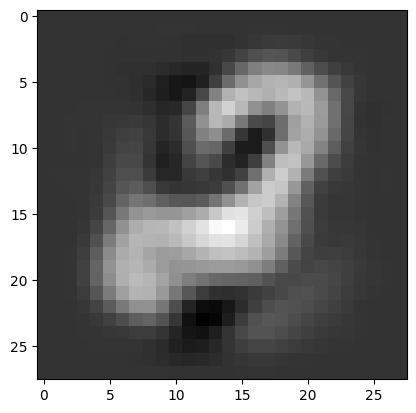

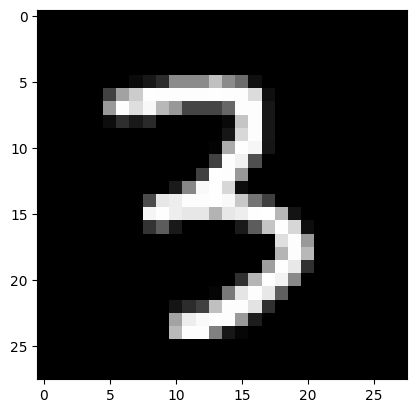

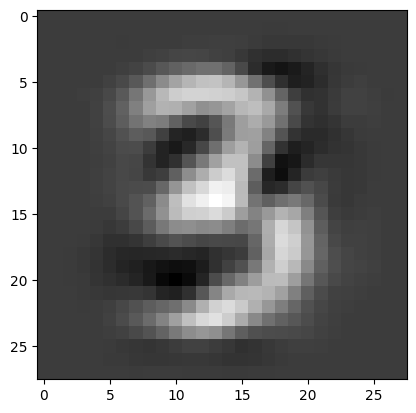

In [25]:
# 학습 이미지 확인
out_img = torch.squeeze(output.data)
print(out_img.size())

for i in range(out_img.size(0)):
  plt.imshow(torch.squeeze(image[i]).numpy(), cmap='gray')
  plt.show()
  plt.imshow(out_img[i].numpy(), cmap='gray')
  plt.show()

In [26]:
total_arr = []
for i in range(1):
  for j, [image, label] in enumerate(test_loader):
    optimizer.zero_grad()
    encoded, output = model(image)
    for k in range(batch_size):
      total_arr.append(encoded[k].view(-1).data.numpy())

    if j > 125:
      break

print(len(total_arr))

2032


In [30]:
print('\n------Starting TSEN------\n')

tsne_model = TSNE(n_components=2, init='pca', random_state=0)
result = tsne_model.fit_transform(total_arr)

print('\n------TSNE Done------\n')


------Starting TSEN------


------TSNE Done------



In [31]:
def imscatter(x, y, image, ax=None, zoom=1):
  if ax is None:
    ax = plt.gca()
  try:
    image = image
  except TypeError:
    pass

  im = OffsetImage(image)
  x, y = np.atleast_1d(x, y)
  artists = []
  for x0, y0 in zip(x, y):
    ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
    artists.append(ax.add_artist(ab))

  ax.update_datalim(np.column_stack([x, y]))
  ax.autoscale()
  return artists


------Starting to plot------

0/2032
1/2032
2/2032
3/2032
4/2032
5/2032
6/2032
7/2032
8/2032
9/2032
10/2032
11/2032
12/2032
13/2032
14/2032
15/2032
16/2032
17/2032
18/2032
19/2032
20/2032
21/2032
22/2032
23/2032
24/2032
25/2032
26/2032
27/2032
28/2032
29/2032
30/2032
31/2032
32/2032
33/2032
34/2032
35/2032
36/2032
37/2032
38/2032
39/2032
40/2032
41/2032
42/2032
43/2032
44/2032
45/2032
46/2032
47/2032
48/2032
49/2032
50/2032
51/2032
52/2032
53/2032
54/2032
55/2032
56/2032
57/2032
58/2032
59/2032
60/2032
61/2032
62/2032
63/2032
64/2032
65/2032
66/2032
67/2032
68/2032
69/2032
70/2032
71/2032
72/2032
73/2032
74/2032
75/2032
76/2032
77/2032
78/2032
79/2032
80/2032
81/2032
82/2032
83/2032
84/2032
85/2032
86/2032
87/2032
88/2032
89/2032
90/2032
91/2032
92/2032
93/2032
94/2032
95/2032
96/2032
97/2032
98/2032
99/2032
100/2032
101/2032
102/2032
103/2032
104/2032
105/2032
106/2032
107/2032
108/2032
109/2032
110/2032
111/2032
112/2032
113/2032
114/2032
115/2032
116/2032
117/2032
118/2032
119/2032

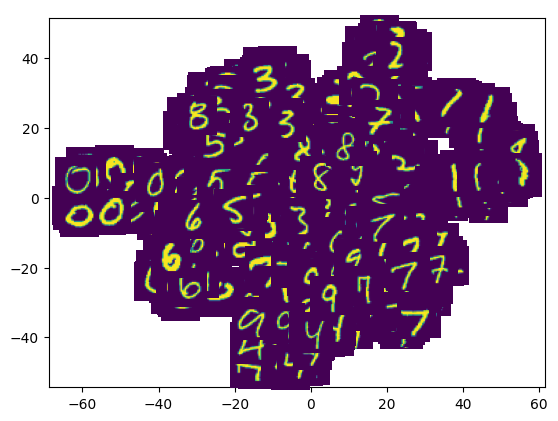

In [32]:
print('\n------Starting to plot------\n')

for i in range(len(result)):
  print('{}/{}'.format(i, len(result)))
  image = mnist_test[i][0][0].numpy()
  imscatter(result[i, 0], result[i, 1], image=image, zoom=0.2)

plt.show()

# Convolution Transposed Exercise
torch.nn.ConvTranspose2d(in_channels, out_channels, kernel_size, stride=1, padding=0, output_padding=0, groups=1, bias=True, dilation=1)

In [33]:
import torch
import torch.nn as nn
import torch.nn.init as init

In [34]:
# input 데이터
img = torch.ones(1, 1, 3, 3)
print(img)

tensor([[[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]]])


In [36]:
# weight 설정
transpose = nn.ConvTranspose2d(in_channels=1, out_channels=1, kernel_size=3, stride=1, padding=0, output_padding=0, bias=False)

print(transpose.weight.data)

init.constant_(transpose.weight.data, 1)

tensor([[[[ 0.1044, -0.1659, -0.2393],
          [ 0.0793, -0.1404, -0.1968],
          [-0.0350,  0.3067,  0.1333]]]])


tensor([[[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]]])

In [37]:
transpose(img)

tensor([[[[1., 2., 3., 2., 1.],
          [2., 4., 6., 4., 2.],
          [3., 6., 9., 6., 3.],
          [2., 4., 6., 4., 2.],
          [1., 2., 3., 2., 1.]]]], grad_fn=<ConvolutionBackward0>)

In [38]:
transpose = nn.ConvTranspose2d(in_channels=1, out_channels=1, kernel_size=3, stride=2, padding=0, output_padding=0, bias=False)
init.constant_(transpose.weight.data, 1)
transpose(img)

tensor([[[[1., 1., 2., 1., 2., 1., 1.],
          [1., 1., 2., 1., 2., 1., 1.],
          [2., 2., 4., 2., 4., 2., 2.],
          [1., 1., 2., 1., 2., 1., 1.],
          [2., 2., 4., 2., 4., 2., 2.],
          [1., 1., 2., 1., 2., 1., 1.],
          [1., 1., 2., 1., 2., 1., 1.]]]], grad_fn=<ConvolutionBackward0>)

In [39]:
transpose = nn.ConvTranspose2d(in_channels=1, out_channels=1, kernel_size=3, stride=2, padding=1, output_padding=0, bias=False)
init.constant_(transpose.weight.data, 1)
transpose(img)

tensor([[[[1., 2., 1., 2., 1.],
          [2., 4., 2., 4., 2.],
          [1., 2., 1., 2., 1.],
          [2., 4., 2., 4., 2.],
          [1., 2., 1., 2., 1.]]]], grad_fn=<ConvolutionBackward0>)

In [40]:
transpose = nn.ConvTranspose2d(in_channels=1, out_channels=1, kernel_size=3, stride=2, padding=0, output_padding=1, bias=False)
init.constant_(transpose.weight.data, 1)
transpose(img)

tensor([[[[1., 1., 2., 1., 2., 1., 1., 0.],
          [1., 1., 2., 1., 2., 1., 1., 0.],
          [2., 2., 4., 2., 4., 2., 2., 0.],
          [1., 1., 2., 1., 2., 1., 1., 0.],
          [2., 2., 4., 2., 4., 2., 2., 0.],
          [1., 1., 2., 1., 2., 1., 1., 0.],
          [1., 1., 2., 1., 2., 1., 1., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0.]]]], grad_fn=<ConvolutionBackward0>)

In [41]:
transpose = nn.ConvTranspose2d(in_channels=1, out_channels=1, kernel_size=3, stride=2, padding=1, output_padding=1, bias=False)
init.constant(transpose.weight.data, 1)
transpose(img)

<ipython-input-41-e3371639a873>:2: FutureWarning: `nn.init.constant` is now deprecated in favor of `nn.init.constant_`.
  init.constant(transpose.weight.data, 1)


tensor([[[[1., 2., 1., 2., 1., 1.],
          [2., 4., 2., 4., 2., 2.],
          [1., 2., 1., 2., 1., 1.],
          [2., 4., 2., 4., 2., 2.],
          [1., 2., 1., 2., 1., 1.],
          [1., 2., 1., 2., 1., 1.]]]], grad_fn=<ConvolutionBackward0>)